### Adding in more datasets

In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from requests import get
from urllib.parse import urlparse

In [2]:
import pandas as pd
import geopandas as gpd
import os
import numpy as np
import matplotlib.pyplot as plt
import mapclassify as mc
import pysal as p
import palettable.matplotlib as palmpl
import seaborn as sns

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, set_link_color_palette

***

### BRINGING IN OTHER DATASETS

In [3]:
lsoa = gpd.read_file("data/geo/LSOAs.gpkg")

<AxesSubplot:>

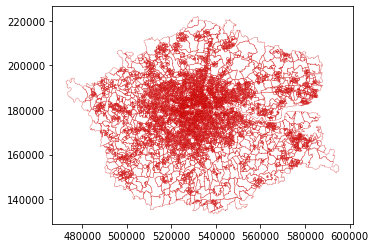

In [13]:
lsoa.plot(edgecolor=(0.8, 0, 0, 0.5), facecolor='none', linewidth=0.5)

In [4]:
print(lsoa.crs)

epsg:27700


In [5]:
CamHS = gpd.read_file('Complete HS/CAMDEN_HS.shp')

In [6]:
CamHS

,objectid,highstreet,highstre_1,area_ha,gdb_geomat,layer,path,geometry
0,594,594,"Eversholt Street, Somers Town",6.303698,None,Eversholt,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((529676.878 182864.075, 529679.937 18..."
1,322,322,"Cricklewood Broadway, Cricklewood.",28.338859,None,Cricklewood,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((523415.282 186284.726, 523422.134 18..."
2,372,372,"Fortune Green Road, Fortune Green.",6.581487,None,Fortune,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((525198.994 185637.081, 525201.838 18..."
3,285,285,"Fortress Road, Tufnell Park.",28.325719,None,Fortress,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((529209.157 185757.682, 529206.506 18..."
4,303,303,"Belsize Lane, Belsize Park.",5.069615,None,Belsize,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((526892.645 185059.806, 526900.890 18..."
5,287,287,Camden Town HS,56.349258,None,CamdenT,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((528129.528 184489.100, 528138.350 18..."
6,97,97,Brecknock Road & York Way.,15.327961,None,Brecknock,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((529626.963 185290.470, 529619.385 18..."
7,468,468,"Mansfield Road, Gospel Oak",3.508042,None,Mansfield,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((528267.619 185602.755, 527975.356 18..."
8,304,304,"Loudoun Road, South Hampstead.",8.078871,None,Loudoun,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((526350.252 184351.109, 526360.006 18..."
9,328,328,"Queen?s Crescent, Gospel Oak.",10.314779,None,Queens,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((528422.038 185153.550, 528417.412 18..."


In [7]:
print(CamHS.crs)

epsg:27700


In [8]:
CamHS['highstreet_name'] = CamHS['layer']

In [9]:
lsoa1 = gpd.clip(lsoa, CamHS)

In [10]:
lsoa1

,objectid,lsoa11cd,lsoa11nm,lsoa11nmw,st_areasha,st_lengths,geometry
137,138,E01000141,Barnet 039A,Barnet 039A,369540.881759,3795.543300,"POLYGON ((524021.203 185603.414, 523985.136 18..."
484,485,E01000490,Brent 023A,Brent 023A,132617.727356,2460.526109,"POLYGON ((524781.290 184466.112, 524714.774 18..."
489,490,E01000495,Brent 023C,Brent 023C,175151.125514,3106.340496,"POLYGON ((524699.245 184583.202, 524604.985 18..."
490,491,E01000497,Brent 011A,Brent 011A,304965.091042,3133.825041,"POLYGON ((523420.595 186283.113, 523440.271 18..."
534,535,E01000545,Brent 028A,Brent 028A,115149.488063,1846.378254,"POLYGON ((524957.809 184226.497, 525011.473 18..."
...,...,...,...,...,...,...,...
2701,2702,E01002766,Islington 015E,Islington 015E,140658.123396,1934.571452,"POLYGON ((530010.169 184621.065, 529986.809 18..."
2718,2719,E01002783,Islington 010B,Islington 010B,96388.856123,1372.660789,"POLYGON ((529859.542 185043.924, 529854.403 18..."
2719,2720,E01002784,Islington 010C,Islington 010C,128402.546459,2411.890371,"POLYGON ((529643.714 185312.832, 529585.019 18..."
4532,4533,E01004646,Westminster 002A,Westminster 002A,212808.819760,2967.039739,"MULTIPOLYGON (((526430.016 183893.800, 526432...."


<AxesSubplot:>

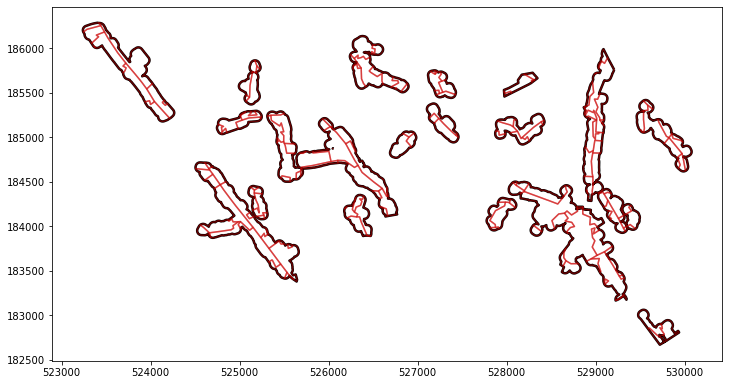

In [11]:
fig, ax = plt.subplots(1,1, figsize=(12,9))

CamHS.plot(edgecolor='black', facecolor='none', linewidth=2.5, ax=ax)
lsoa1.plot(edgecolor=(0.8, 0, 0, 0.5), facecolor='none', linewidth=1.5, ax=ax)


### Median House Prices

In [12]:
house = pd.read_csv("High Street Dimensions/Median_Prices_Quarterly.csv")

In [13]:
house

,Unnamed: 0,lsoa_cd,median_95Q1,median_95Q2,median_95Q3,median_95Q4,median_96Q1,median_96Q2,median_96Q3,median_96Q4,...,median_16Q3,median_16Q4,median_17Q1,median_17Q2,median_17Q3,median_17Q4,median_18Q1,median_18Q2,median_18Q3,median_18Q4
0,1,NaN,59000.0,62500.0,55000.0,60000.0,61495.0,50000.0,70500.0,71000.0,...,86415.0,50450.0,66435.0,25091.0,39997.5,108705.0,58000.0,72934.0,60000.0,75950.0
1,2,E01000001,99500.0,112475.0,123500.0,104671.0,129000.0,129750.0,152500.0,169375.0,...,880000.0,972500.0,1085000.0,872500.0,972500.0,2150000.0,900000.0,825000.0,695000.0,806000.0
2,3,E01000002,110000.0,135000.0,112500.0,132000.0,119275.0,112000.0,135000.0,117500.0,...,852500.0,937500.0,960000.0,970000.0,849950.0,776774.0,720000.0,617500.0,870000.0,997000.0
3,4,E01000003,75000.0,64200.0,66000.0,92000.0,90000.0,65000.0,73000.0,90000.0,...,795000.0,686250.0,751875.0,760000.0,830000.0,750000.0,702500.0,655250.0,730000.0,683500.0
4,5,E01000005,NaN,NaN,61000.0,NaN,55000.0,70000.0,NaN,55000.0,...,590000.0,2405000.0,712500.0,485000.0,2800000.0,375000.0,790000.0,20000.0,171849.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34751,34752,W01001954,71050.0,82500.0,105000.0,78500.0,90000.0,93500.0,104000.0,105000.0,...,360000.0,348500.0,475000.0,297475.0,350000.0,340000.0,284000.0,285000.0,429950.0,118000.0
34752,34753,W01001955,30000.0,NaN,250000.0,20000.0,33000.0,NaN,25000.0,NaN,...,96000.0,189500.0,125000.0,127000.0,120000.0,80000.0,802500.0,275000.0,130000.0,60000.0
34753,34754,W01001956,61225.0,65500.0,56875.0,57750.0,50000.0,49000.0,67000.0,59375.0,...,150000.0,168500.0,217500.0,156000.0,305995.0,291997.5,314995.0,163000.0,202497.5,183500.0
34754,34755,W01001957,60000.0,42000.0,33500.0,48000.0,38750.0,27500.0,45000.0,51500.0,...,170000.0,136122.5,133000.0,106500.0,130000.0,138000.0,116500.0,127000.0,152500.0,155000.0


In [14]:
house["lsoa11cd"] = house['lsoa_cd']

In [15]:
house1 = pd.merge(lsoa, house, on="lsoa11cd")

In [16]:
house1

,objectid,lsoa11cd,lsoa11nm,lsoa11nmw,st_areasha,st_lengths,geometry,Unnamed: 0,lsoa_cd,median_95Q1,...,median_16Q3,median_16Q4,median_17Q1,median_17Q2,median_17Q3,median_17Q4,median_18Q1,median_18Q2,median_18Q3,median_18Q4
0,1,E01000001,City of London 001A,City of London 001A,1.333208e+05,2291.846072,"MULTIPOLYGON (((532106.894 182011.476, 532164....",2,E01000001,99500.0,...,880000.0,972500.0,1085000.0,872500.0,972500.0,2150000.0,900000.0,825000.0,695000.0,806000.0
1,2,E01000002,City of London 001B,City of London 001B,2.261913e+05,2433.960112,"MULTIPOLYGON (((532748.624 181787.125, 532673....",3,E01000002,110000.0,...,852500.0,937500.0,960000.0,970000.0,849950.0,776774.0,720000.0,617500.0,870000.0,997000.0
2,3,E01000003,City of London 001C,City of London 001C,5.730297e+04,1142.359799,"MULTIPOLYGON (((532136.950 182198.368, 532160....",4,E01000003,75000.0,...,795000.0,686250.0,751875.0,760000.0,830000.0,750000.0,702500.0,655250.0,730000.0,683500.0
3,4,E01000005,City of London 001E,City of London 001E,1.907388e+05,2167.868343,"MULTIPOLYGON (((533809.765 180767.968, 533650....",5,E01000005,NaN,...,590000.0,2405000.0,712500.0,485000.0,2800000.0,375000.0,790000.0,20000.0,171849.0,NaN
4,5,E01000006,Barking and Dagenham 016A,Barking and Dagenham 016A,1.441958e+05,1935.510354,"MULTIPOLYGON (((545123.925 184315.102, 545273....",6,E01000006,68000.0,...,397500.0,407000.0,432000.0,342500.0,249000.0,415000.0,300000.0,400000.0,240000.0,430000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7161,32818,E01033742,Greenwich 007F,Greenwich 007F,1.233092e+05,1860.310172,"MULTIPOLYGON (((544644.574 179824.771, 544768....",32818,E01033742,44000.0,...,276500.0,255000.0,310000.0,365000.0,370000.0,255000.0,367000.0,377500.0,327500.0,111600.0
7162,32819,E01033743,Greenwich 002H,Greenwich 002H,1.004853e+06,5237.180226,"MULTIPOLYGON (((546581.131 181097.916, 546688....",32819,E01033743,NaN,...,300000.0,257000.0,300000.0,320000.0,264000.0,240000.0,290000.0,368780.0,282000.0,309000.0
7163,32820,E01033744,Greenwich 007G,Greenwich 007G,1.522620e+05,2149.370918,"MULTIPOLYGON (((544538.375 179447.212, 544604....",32820,E01033744,NaN,...,300000.0,299995.0,297000.0,292500.0,300000.0,298500.0,271250.0,285000.0,342500.0,325000.0
7164,32821,E01033745,Greenwich 002I,Greenwich 002I,5.584777e+05,4193.828349,"MULTIPOLYGON (((546417.680 180152.361, 546322....",32821,E01033745,NaN,...,280000.0,315000.0,307500.0,315000.0,299500.0,287500.0,295000.0,250000.0,313000.0,322500.0


In [17]:
polygons = CamHS.copy()

# Spatial Joins
pointsInPolygon = gpd.sjoin(house1, polygons, how="inner", op='intersects')

# Add a field with 1 as a constant value
pointsInPolygon['house prices']=1

# Group according to the column by which you want to aggregate data
house2 = pointsInPolygon.groupby(['highstreet_name']).sum()

In [18]:
house2

,objectid_left,st_areasha,st_lengths,Unnamed: 0,median_95Q1,median_95Q2,median_95Q3,median_95Q4,median_96Q1,median_96Q2,...,median_17Q4,median_18Q1,median_18Q2,median_18Q3,median_18Q4,index_right,objectid_right,highstreet,area_ha,house prices
highstreet_name,,,,,,,,,,,,,,,,,,,,,
Belsize,2576,4.195492e+05,6462.295720,2579,448725.0,539975.0,423000.0,437450.0,509950.0,456250.0,...,2980000.0,4575000.0,3607500.0,3855000.0,3936250.0,12,909,909,15.208845,3
Brecknock,15264,9.816231e+05,17395.082236,15273,587500.0,505750.0,561747.5,616850.0,573500.0,560500.0,...,6856000.0,5300000.0,5143225.0,5219450.0,5099125.0,54,873,873,137.951646,9
CamdenT,12439,1.775919e+06,30423.046147,12453,944250.0,1496575.0,1200500.0,1359749.0,1348900.0,1252450.0,...,7589000.0,9787070.0,9915504.0,11893806.0,8540250.0,70,4018,4018,788.889607,14
Cricklewood,4519,1.756821e+06,22506.707124,4527,707187.5,805750.0,661697.5,640600.0,656675.0,847000.0,...,5328833.0,6096250.0,9333750.0,4847250.0,3701250.0,8,2576,2576,226.710875,8
Eversholt,1877,2.233864e+05,3554.416000,1879,68750.0,0.0,0.0,64500.0,36000.0,118000.0,...,1238880.0,1307240.0,565000.0,575000.0,0.0,0,1188,1188,12.607396,2
Fortress,8826,1.449077e+06,25875.931361,8836,876500.0,934000.0,970500.0,1069500.0,1109125.0,1331600.0,...,6789500.0,8267000.0,6997550.0,7398595.0,5478000.0,30,2850,2850,283.257188,10
Fortune,4298,9.723385e+05,13483.875961,4303,1065450.0,1133702.5,791750.0,596000.0,983250.0,929500.0,...,5889583.0,5945000.0,6310000.0,4085250.0,6278066.0,10,1860,1860,32.907436,5
Hampstead,6126,2.235913e+06,23776.701029,6133,1427225.0,1423750.0,1502125.0,1288125.0,1953447.5,1954250.0,...,10954500.0,12912000.0,8500000.0,11313720.0,9503195.0,84,3878,3878,126.110071,7
Haverstock,3419,4.728354e+05,7716.849190,3423,332750.0,543475.0,821250.0,481000.0,532750.0,589000.0,...,3326500.0,2247680.0,4686500.0,2330800.0,4072000.0,44,1224,1224,28.297330,4


In [19]:
house2.to_csv("outputs_csv/total median house prices.csv")

In [20]:
house3 = pointsInPolygon.groupby(['highstreet_name']).mean()

In [21]:
house3

,objectid_left,st_areasha,st_lengths,Unnamed: 0,median_95Q1,median_95Q2,median_95Q3,median_95Q4,median_96Q1,median_96Q2,...,median_17Q4,median_18Q1,median_18Q2,median_18Q3,median_18Q4,index_right,objectid_right,highstreet,area_ha,house prices
highstreet_name,,,,,,,,,,,,,,,,,,,,,
Belsize,858.666667,139849.743181,2154.098573,859.666667,149575.000000,179991.666667,141000.000000,145816.666667,169983.333333,152083.333333,...,9.933333e+05,1.525000e+06,1.202500e+06,1.285000e+06,1.312083e+06,4.0,303.0,303.0,5.069615,1.0
Brecknock,1696.000000,109069.231677,1932.786915,1697.000000,73437.500000,84291.666667,80249.642857,77106.250000,81928.571429,80071.428571,...,7.617778e+05,5.888889e+05,6.429031e+05,5.799389e+05,6.373906e+05,6.0,97.0,97.0,15.327961,1.0
CamdenT,888.500000,126851.392098,2173.074725,889.500000,104916.666667,106898.214286,100041.666667,104596.076923,134890.000000,104370.833333,...,5.837692e+05,7.528515e+05,7.627311e+05,9.149082e+05,7.116875e+05,5.0,287.0,287.0,56.349258,1.0
Cricklewood,564.875000,219602.605649,2813.338391,565.875000,88398.437500,100718.750000,82712.187500,80075.000000,82084.375000,105875.000000,...,6.661041e+05,7.620312e+05,1.333393e+06,6.924643e+05,5.287500e+05,1.0,322.0,322.0,28.338859,1.0
Eversholt,938.500000,111693.209736,1777.208000,939.500000,68750.000000,NaN,NaN,64500.000000,36000.000000,118000.000000,...,1.238880e+06,6.536200e+05,5.650000e+05,5.750000e+05,NaN,0.0,594.0,594.0,6.303698,1.0
Fortress,882.600000,144907.711122,2587.593136,883.600000,109562.500000,116750.000000,107833.333333,118833.333333,158446.428571,147955.555556,...,7.543889e+05,8.267000e+05,6.997550e+05,7.398595e+05,6.847500e+05,3.0,285.0,285.0,28.325719,1.0
Fortune,859.600000,194467.694727,2696.775192,860.600000,213090.000000,226740.500000,158350.000000,149000.000000,196650.000000,185900.000000,...,1.177917e+06,1.189000e+06,1.262000e+06,8.170500e+05,1.255613e+06,2.0,372.0,372.0,6.581487,1.0
Hampstead,875.142857,319416.133816,3396.671576,876.142857,203889.285714,203392.857143,214589.285714,184017.857143,279063.928571,279178.571429,...,1.564929e+06,1.844571e+06,1.214286e+06,1.616246e+06,1.357599e+06,12.0,554.0,554.0,18.015724,1.0
Haverstock,854.750000,118208.842837,1929.212297,855.750000,110916.666667,135868.750000,205312.500000,120250.000000,133187.500000,147250.000000,...,8.316250e+05,7.492267e+05,1.171625e+06,7.769333e+05,1.018000e+06,11.0,306.0,306.0,7.074332,1.0


In [34]:
house3.to_csv("outputs_csv/mean median house prices.csv")

### Transaction Count

In [30]:
transa = pd.read_csv("High Street Dimensions/Transaction_Count_Quarterly.csv")

In [31]:
transa

,Unnamed: 0,lsoa_cd,count_95Q1,count_95Q2,count_95Q3,count_95Q4,count_96Q1,count_96Q2,count_96Q3,count_96Q4,...,count_16Q3,count_16Q4,count_17Q1,count_17Q2,count_17Q3,count_17Q4,count_18Q1,count_18Q2,count_18Q3,count_18Q4
0,1,NaN,147.0,162.0,155.0,157.0,158.0,172.0,176.0,202.0,...,1106.0,2464.0,1754.0,2059.0,1532.0,1666.0,1453.0,1804.0,1647.0,1531.0
1,2,E01000001,13.0,10.0,16.0,23.0,20.0,33.0,51.0,36.0,...,3.0,4.0,6.0,8.0,18.0,10.0,10.0,6.0,15.0,7.0
2,3,E01000002,11.0,15.0,13.0,9.0,8.0,5.0,13.0,18.0,...,10.0,8.0,11.0,11.0,17.0,9.0,7.0,12.0,7.0,13.0
3,4,E01000003,11.0,7.0,9.0,6.0,3.0,13.0,19.0,21.0,...,2.0,8.0,14.0,39.0,20.0,7.0,12.0,14.0,5.0,10.0
4,5,E01000005,NaN,NaN,2.0,NaN,3.0,2.0,NaN,1.0,...,6.0,3.0,2.0,1.0,3.0,3.0,3.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34751,34752,W01001954,2.0,3.0,5.0,2.0,5.0,7.0,11.0,5.0,...,11.0,8.0,3.0,8.0,15.0,11.0,2.0,3.0,9.0,10.0
34752,34753,W01001955,3.0,NaN,1.0,3.0,2.0,NaN,1.0,NaN,...,8.0,10.0,7.0,13.0,5.0,6.0,2.0,4.0,6.0,2.0
34753,34754,W01001956,8.0,12.0,14.0,14.0,5.0,11.0,13.0,15.0,...,9.0,8.0,10.0,5.0,2.0,20.0,11.0,11.0,20.0,8.0
34754,34755,W01001957,1.0,3.0,3.0,4.0,4.0,4.0,5.0,1.0,...,3.0,4.0,4.0,2.0,3.0,7.0,6.0,2.0,4.0,5.0


In [32]:
transa["lsoa11cd"] = transa['lsoa_cd']

In [33]:
transc = pd.merge(lsoa, transa, on="lsoa11cd")

In [34]:
polygons = CamHS.copy()

# Spatial Joins
pointsInPolygon = gpd.sjoin(transc, polygons, how="inner", op='intersects')

# Add a field with 1 as a constant value
pointsInPolygon['house transactions']=1

# Group according to the column by which you want to aggregate data
house_transa = pointsInPolygon.groupby(['highstreet_name']).sum()

In [35]:
house_transa

,objectid_left,st_areasha,st_lengths,Unnamed: 0,count_95Q1,count_95Q2,count_95Q3,count_95Q4,count_96Q1,count_96Q2,...,count_17Q4,count_18Q1,count_18Q2,count_18Q3,count_18Q4,index_right,objectid_right,highstreet,area_ha,house transactions
highstreet_name,,,,,,,,,,,,,,,,,,,,,
Belsize,2576,4.195492e+05,6462.295720,2579,28.0,32.0,32.0,33.0,23.0,35.0,...,16.0,14.0,21.0,22.0,13.0,12,909,909,15.208845,3
Brecknock,15264,9.816231e+05,17395.082236,15273,31.0,19.0,33.0,35.0,31.0,35.0,...,35.0,26.0,23.0,28.0,29.0,54,873,873,137.951646,9
CamdenT,12439,1.775919e+06,30423.046147,12453,37.0,45.0,58.0,55.0,57.0,60.0,...,58.0,45.0,48.0,53.0,41.0,70,4018,4018,788.889607,14
Cricklewood,4519,1.756821e+06,22506.707124,4527,36.0,52.0,43.0,55.0,32.0,44.0,...,30.0,32.0,38.0,30.0,18.0,8,2576,2576,226.710875,8
Eversholt,1877,2.233864e+05,3554.416000,1879,2.0,0.0,0.0,2.0,5.0,1.0,...,5.0,3.0,2.0,1.0,0.0,0,1188,1188,12.607396,2
Fortress,8826,1.449077e+06,25875.931361,8836,22.0,32.0,48.0,42.0,19.0,41.0,...,54.0,55.0,39.0,46.0,28.0,30,2850,2850,283.257188,10
Fortune,4298,9.723385e+05,13483.875961,4303,24.0,35.0,46.0,30.0,35.0,43.0,...,22.0,26.0,49.0,43.0,30.0,10,1860,1860,32.907436,5
Hampstead,6126,2.235913e+06,23776.701029,6133,61.0,57.0,54.0,38.0,29.0,68.0,...,34.0,39.0,38.0,44.0,27.0,84,3878,3878,126.110071,7
Haverstock,3419,4.728354e+05,7716.849190,3423,25.0,33.0,29.0,41.0,27.0,30.0,...,34.0,19.0,21.0,15.0,22.0,44,1224,1224,28.297330,4


In [42]:
house_transa.to_csv("outputs_csv/house transactions.csv")

### Household Income Estimates

In [46]:
income = pd.read_csv("https://data.london.gov.uk/download/household-income-estimates-small-areas/7c1099d9-327b-4f20-abb8-8c24a3c10c47/modelled-household-income-estimates-lsoa.csv", encoding= 'unicode_escape')

In [54]:
income

,Code,Name,LAD code,Borough,Mean 2001/02,Mean 2002/03,Mean 2003/04,Mean 2004/05,Mean 2005/06,Mean 2006/07,...,Median 2004/05,Median 2005/06,Median 2006/07,Median 2007/08,Median 2008/09,Median 2009/10,Median 2010/11,Median 2011/12,Median 2012/13,lsoa11cd
0,E01000001,City of London 001A,E09000001,City of London,"£70,480","£71,790","£75,340","£80,300","£81,980","£87,310",...,"£51,150","£51,410","£54,540","£56,250","£58,110","£60,720","£62,420","£65,520","£66,790",E01000001
1,E01000002,City of London 001B,E09000001,City of London,"£69,250","£70,790","£74,560","£79,740","£81,680","£87,280",...,"£50,860","£51,250","£54,520","£56,380","£58,390","£61,160","£63,030","£66,300","£67,750",E01000002
2,E01000003,City of London 001C,E09000001,City of London,"£54,030","£55,240","£58,190","£62,270","£63,830","£68,260",...,"£41,180","£41,540","£44,230","£45,800","£47,480","£49,800","£51,390","£54,140","£55,390",E01000003
3,E01000005,City of London 001E,E09000001,City of London,"£46,340","£47,280","£49,720","£53,120","£54,390","£58,110",...,"£35,610","£35,900","£38,200","£39,540","£40,990","£42,980","£44,360","£46,740","£47,840",E01000005
4,E01032739,City of London 001F,E09000001,City of London,"£68,780","£69,790","£72,970","£77,490","£78,830","£83,680",...,"£49,670","£49,770","£52,650","£54,160","£55,800","£58,160","£59,650","£62,460","£63,530",E01032739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4830,E01033604,Westminster 009J,E09000033,Westminster,"£37,470","£37,230","£38,210","£39,930","£40,050","£41,990",...,"£24,150","£23,840","£24,880","£25,280","£25,770","£26,600","£27,040","£28,080","£28,360",E01033604
4831,E01033605,Westminster 009K,E09000033,Westminster,"£33,600","£33,590","£34,690","£36,480","£36,820","£38,850",...,"£21,910","£21,760","£22,860","£23,380","£23,980","£24,910","£25,490","£26,640","£27,060",E01033605
4832,E01033606,Westminster 014F,E09000033,Westminster,"£55,880","£56,730","£59,380","£63,130","£64,330","£68,390",...,"£37,200","£37,330","£39,540","£40,730","£42,020","£43,860","£45,050","£47,240","£48,120",E01033606
4833,E01033607,Westminster 014G,E09000033,Westminster,"£55,390","£56,250","£58,890","£62,630","£63,830","£67,870",...,"£36,950","£37,080","£39,280","£40,470","£41,750","£43,560","£44,730","£46,880","£47,730",E01033607


In [69]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Code            4835 non-null   object
 1   Name            4835 non-null   object
 2   LAD code        4835 non-null   object
 3   Borough         4835 non-null   object
 4   Mean 2001/02    4835 non-null   object
 5   Mean 2002/03    4835 non-null   object
 6   Mean 2003/04    4835 non-null   object
 7   Mean 2004/05    4835 non-null   object
 8   Mean 2005/06    4835 non-null   object
 9   Mean 2006/07    4835 non-null   object
 10  Mean 2007/08    4835 non-null   object
 11  Mean 2008/09    4835 non-null   object
 12  Mean 2009/10    4835 non-null   object
 13  Mean 2010/11    4835 non-null   object
 14  Mean 2011/12    4835 non-null   object
 15  Mean 2012/13    4835 non-null   object
 16  Median 2001/02  4835 non-null   object
 17  Median 2002/03  4835 non-null   object
 18  Median 2

In [78]:
print(list(income.columns.values))

['Code', 'Name', 'LAD code', 'Borough', 'Mean 2001/02', 'Mean 2002/03', 'Mean 2003/04', 'Mean 2004/05', 'Mean 2005/06', 'Mean 2006/07', 'Mean 2007/08', 'Mean 2008/09', 'Mean 2009/10', 'Mean 2010/11', 'Mean 2011/12', 'Mean 2012/13', 'Median 2001/02', 'Median 2002/03', 'Median 2003/04', 'Median 2004/05', 'Median 2005/06', 'Median 2006/07', 'Median 2007/08', 'Median 2008/09', 'Median 2009/10', 'Median 2010/11', 'Median 2011/12', 'Median 2012/13', 'lsoa11cd']


In [79]:
cols = ['Mean 2001/02', 'Mean 2002/03', 'Mean 2003/04', 'Mean 2004/05', 'Mean 2005/06', 'Mean 2006/07', 'Mean 2007/08', 'Mean 2008/09', 'Mean 2009/10', 'Mean 2010/11', 'Mean 2011/12', 'Mean 2012/13', 'Median 2001/02', 'Median 2002/03', 'Median 2003/04', 'Median 2004/05', 'Median 2005/06', 'Median 2006/07', 'Median 2007/08', 'Median 2008/09', 'Median 2009/10', 'Median 2010/11', 'Median 2011/12', 'Median 2012/13']

In [81]:
for m in cols:
    print(f"Converting {m}")
    income[m] = income[m].str.replace('£','').str.replace(',','').astype('float')

Converting Mean 2001/02
Converting Mean 2002/03
Converting Mean 2003/04
Converting Mean 2004/05
Converting Mean 2005/06
Converting Mean 2006/07
Converting Mean 2007/08
Converting Mean 2008/09
Converting Mean 2009/10
Converting Mean 2010/11
Converting Mean 2011/12
Converting Mean 2012/13
Converting Median 2001/02
Converting Median 2002/03
Converting Median 2003/04
Converting Median 2004/05
Converting Median 2005/06
Converting Median 2006/07
Converting Median 2007/08
Converting Median 2008/09
Converting Median 2009/10
Converting Median 2010/11
Converting Median 2011/12
Converting Median 2012/13


In [82]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Code            4835 non-null   object 
 1   Name            4835 non-null   object 
 2   LAD code        4835 non-null   object 
 3   Borough         4835 non-null   object 
 4   Mean 2001/02    4835 non-null   float64
 5   Mean 2002/03    4835 non-null   float64
 6   Mean 2003/04    4835 non-null   float64
 7   Mean 2004/05    4835 non-null   float64
 8   Mean 2005/06    4835 non-null   float64
 9   Mean 2006/07    4835 non-null   float64
 10  Mean 2007/08    4835 non-null   float64
 11  Mean 2008/09    4835 non-null   float64
 12  Mean 2009/10    4835 non-null   float64
 13  Mean 2010/11    4835 non-null   float64
 14  Mean 2011/12    4835 non-null   float64
 15  Mean 2012/13    4835 non-null   float64
 16  Median 2001/02  4835 non-null   float64
 17  Median 2002/03  4835 non-null   f

In [83]:
income["lsoa11cd"] = income['Code']

In [84]:
incomes = pd.merge(lsoa, income, on="lsoa11cd")

In [85]:
incomes

,objectid,lsoa11cd,lsoa11nm,lsoa11nmw,st_areasha,st_lengths,geometry,Code,Name,LAD code,...,Median 2003/04,Median 2004/05,Median 2005/06,Median 2006/07,Median 2007/08,Median 2008/09,Median 2009/10,Median 2010/11,Median 2011/12,Median 2012/13
0,1,E01000001,City of London 001A,City of London 001A,1.333208e+05,2291.846072,"MULTIPOLYGON (((532106.894 182011.476, 532164....",E01000001,City of London 001A,E09000001,...,48110.0,51150.0,51410.0,54540.0,56250.0,58110.0,60720.0,62420.0,65520.0,66790.0
1,2,E01000002,City of London 001B,City of London 001B,2.261913e+05,2433.960112,"MULTIPOLYGON (((532748.624 181787.125, 532673....",E01000002,City of London 001B,E09000001,...,47700.0,50860.0,51250.0,54520.0,56380.0,58390.0,61160.0,63030.0,66300.0,67750.0
2,3,E01000003,City of London 001C,City of London 001C,5.730297e+04,1142.359799,"MULTIPOLYGON (((532136.950 182198.368, 532160....",E01000003,City of London 001C,E09000001,...,38590.0,41180.0,41540.0,44230.0,45800.0,47480.0,49800.0,51390.0,54140.0,55390.0
3,4,E01000005,City of London 001E,City of London 001E,1.907388e+05,2167.868343,"MULTIPOLYGON (((533809.765 180767.968, 533650....",E01000005,City of London 001E,E09000001,...,33410.0,35610.0,35900.0,38200.0,39540.0,40990.0,42980.0,44360.0,46740.0,47840.0
4,5,E01000006,Barking and Dagenham 016A,Barking and Dagenham 016A,1.441958e+05,1935.510354,"MULTIPOLYGON (((545123.925 184315.102, 545273....",E01000006,Barking and Dagenham 016A,E09000002,...,27700.0,29440.0,29610.0,31460.0,32500.0,33640.0,35230.0,36300.0,38200.0,39040.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4830,32818,E01033742,Greenwich 007F,Greenwich 007F,1.233092e+05,1860.310172,"MULTIPOLYGON (((544644.574 179824.771, 544768....",E01033742,Greenwich 007F,E09000011,...,24300.0,26340.0,26980.0,29150.0,30620.0,32170.0,34170.0,35690.0,38020.0,39300.0
4831,32819,E01033743,Greenwich 002H,Greenwich 002H,1.004853e+06,5237.180226,"MULTIPOLYGON (((546581.131 181097.916, 546688....",E01033743,Greenwich 002H,E09000011,...,28130.0,29670.0,29600.0,31180.0,31950.0,32790.0,34050.0,34790.0,36300.0,36800.0
4832,32820,E01033744,Greenwich 007G,Greenwich 007G,1.522620e+05,2149.370918,"MULTIPOLYGON (((544538.375 179447.212, 544604....",E01033744,Greenwich 007G,E09000011,...,24150.0,25660.0,25800.0,27400.0,28300.0,29280.0,30660.0,31580.0,33220.0,33940.0
4833,32821,E01033745,Greenwich 002I,Greenwich 002I,5.584777e+05,4193.828349,"MULTIPOLYGON (((546417.680 180152.361, 546322....",E01033745,Greenwich 002I,E09000011,...,27600.0,29260.0,29340.0,31050.0,31960.0,32950.0,34360.0,35260.0,36940.0,37590.0


In [86]:
polygons = CamHS.copy()

# Spatial Joins
pointsInPolygon = gpd.sjoin(incomes, polygons, how="inner", op='intersects')

In [87]:
pointsInPolygon

,objectid_left,lsoa11cd,lsoa11nm,lsoa11nmw,st_areasha,st_lengths,geometry,Code,Name,LAD code,...,Median 2012/13,index_right,objectid_right,highstreet,highstre_1,area_ha,gdb_geomat,layer,path,highstreet_name
137,138,E01000141,Barnet 039A,Barnet 039A,369540.881759,3795.543300,"MULTIPOLYGON (((523893.694 186062.157, 524003....",E01000141,Barnet 039A,E09000003,...,32680.0,1,322,322,"Cricklewood Broadway, Cricklewood.",28.338859,None,Cricklewood,C:/Users/CHRISTINA/OneDrive - University Colle...,Cricklewood
490,491,E01000497,Brent 011A,Brent 011A,304965.091042,3133.825041,"MULTIPOLYGON (((523233.679 186532.570, 523330....",E01000497,Brent 011A,E09000005,...,32830.0,1,322,322,"Cricklewood Broadway, Cricklewood.",28.338859,None,Cricklewood,C:/Users/CHRISTINA/OneDrive - University Colle...,Cricklewood
542,543,E01000553,Brent 015A,Brent 015A,143593.744998,1904.242168,"MULTIPOLYGON (((523518.058 186117.312, 523629....",E01000553,Brent 015A,E09000005,...,33670.0,1,322,322,"Cricklewood Broadway, Cricklewood.",28.338859,None,Cricklewood,C:/Users/CHRISTINA/OneDrive - University Colle...,Cricklewood
543,544,E01000554,Brent 015B,Brent 015B,214178.647322,2734.647886,"MULTIPOLYGON (((523297.828 186020.203, 523317....",E01000554,Brent 015B,E09000005,...,34530.0,1,322,322,"Cricklewood Broadway, Cricklewood.",28.338859,None,Cricklewood,C:/Users/CHRISTINA/OneDrive - University Colle...,Cricklewood
545,546,E01000556,Brent 015D,Brent 015D,97213.453021,1700.434594,"MULTIPOLYGON (((523819.372 185716.178, 523881....",E01000556,Brent 015D,E09000005,...,32730.0,1,322,322,"Cricklewood Broadway, Cricklewood.",28.338859,None,Cricklewood,C:/Users/CHRISTINA/OneDrive - University Colle...,Cricklewood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,945,E01000962,Camden 016A,Camden 016A,95021.940016,2237.739963,"MULTIPOLYGON (((526260.550 184500.085, 526221....",E01000962,Camden 016A,E09000007,...,52120.0,8,304,304,"Loudoun Road, South Hampstead.",8.078871,None,Loudoun,C:/Users/CHRISTINA/OneDrive - University Colle...,Loudoun
948,949,E01000966,Camden 016D,Camden 016D,129248.597475,2098.025338,"MULTIPOLYGON (((525903.632 184353.672, 525906....",E01000966,Camden 016D,E09000007,...,54400.0,8,304,304,"Loudoun Road, South Hampstead.",8.078871,None,Loudoun,C:/Users/CHRISTINA/OneDrive - University Colle...,Loudoun
4532,4533,E01004646,Westminster 002A,Westminster 002A,212808.819760,2967.039739,"MULTIPOLYGON (((526616.733 183878.165, 526588....",E01004646,Westminster 002A,E09000033,...,63250.0,8,304,304,"Loudoun Road, South Hampstead.",8.078871,None,Loudoun,C:/Users/CHRISTINA/OneDrive - University Colle...,Loudoun
937,938,E01000955,Camden 022D,Camden 022D,63288.408375,1258.904082,"MULTIPOLYGON (((529551.646 183161.689, 529578....",E01000955,Camden 022D,E09000007,...,29060.0,0,594,594,"Eversholt Street, Somers Town",6.303698,None,Eversholt,C:/Users/CHRISTINA/OneDrive - University Colle...,Eversholt


In [88]:
# Group according to the column by which you want to aggregate data
income_est = pointsInPolygon.groupby(['highstreet_name']).sum()

In [89]:
income_est

,objectid_left,st_areasha,st_lengths,Mean 2001/02,Mean 2002/03,Mean 2003/04,Mean 2004/05,Mean 2005/06,Mean 2006/07,Mean 2007/08,...,Median 2007/08,Median 2008/09,Median 2009/10,Median 2010/11,Median 2011/12,Median 2012/13,index_right,objectid_right,highstreet,area_ha
highstreet_name,,,,,,,,,,,,,,,,,,,,,
Belsize,2576,4.195492e+05,6462.295720,186720.0,190420.0,200100.0,213520.0,218270.0,232770.0,237630.0,...,145280.0,150230.0,157160.0,161770.0,169980.0,173490.0,12,909,909,15.208845
Brecknock,15264,9.816231e+05,17395.082236,340780.0,344150.0,358770.0,380370.0,386840.0,410910.0,418140.0,...,282510.0,291530.0,304530.0,313110.0,328740.0,335350.0,54,873,873,137.951646
CamdenT,12439,1.775919e+06,30423.046147,547750.0,554620.0,579520.0,615560.0,626940.0,666570.0,678690.0,...,437650.0,451730.0,471730.0,484830.0,508740.0,518540.0,70,4018,4018,788.889607
Cricklewood,4519,1.756821e+06,22506.707124,295870.0,297290.0,308190.0,324840.0,328380.0,346680.0,350630.0,...,259540.0,266220.0,276410.0,282510.0,294940.0,299210.0,8,2576,2576,226.710875
Eversholt,1877,2.233864e+05,3554.416000,61680.0,62500.0,65420.0,69690.0,71250.0,76100.0,77860.0,...,50490.0,52420.0,55070.0,56970.0,60170.0,61750.0,0,1188,1188,12.607396
Fortress,8826,1.449077e+06,25875.931361,415210.0,420840.0,440070.0,467820.0,476850.0,507410.0,517130.0,...,334320.0,345410.0,361150.0,371560.0,390340.0,398360.0,30,2850,2850,283.257188
Fortune,4298,9.723385e+05,13483.875961,292050.0,297270.0,311820.0,332220.0,339160.0,361280.0,368470.0,...,227890.0,235540.0,246290.0,253420.0,266240.0,271720.0,10,1860,1860,32.907436
Hampstead,6126,2.235913e+06,23776.701029,474480.0,483930.0,508480.0,542500.0,554440.0,591140.0,603330.0,...,362690.0,375000.0,392240.0,403680.0,424180.0,432960.0,84,3878,3878,126.110071
Haverstock,3419,4.728354e+05,7716.849190,208770.0,213900.0,225800.0,242000.0,248430.0,265950.0,272480.0,...,170880.0,177240.0,185920.0,191860.0,202100.0,206740.0,44,1224,1224,28.297330


In [90]:
income_est.to_csv("outputs_csv/total household estimates.csv")

In [91]:
income_est1 = pointsInPolygon.groupby(['highstreet_name']).mean()

In [92]:
income_est1

,objectid_left,st_areasha,st_lengths,Mean 2001/02,Mean 2002/03,Mean 2003/04,Mean 2004/05,Mean 2005/06,Mean 2006/07,Mean 2007/08,...,Median 2007/08,Median 2008/09,Median 2009/10,Median 2010/11,Median 2011/12,Median 2012/13,index_right,objectid_right,highstreet,area_ha
highstreet_name,,,,,,,,,,,,,,,,,,,,,
Belsize,858.666667,139849.743181,2154.098573,62240.000000,63473.333333,66700.000000,71173.333333,72756.666667,77590.000000,79210.000000,...,48426.666667,50076.666667,52386.666667,53923.333333,56660.000000,57830.000000,4.0,303.0,303.0,5.069615
Brecknock,1696.000000,109069.231677,1932.786915,37864.444444,38238.888889,39863.333333,42263.333333,42982.222222,45656.666667,46460.000000,...,31390.000000,32392.222222,33836.666667,34790.000000,36526.666667,37261.111111,6.0,97.0,97.0,15.327961
CamdenT,888.500000,126851.392098,2173.074725,39125.000000,39615.714286,41394.285714,43968.571429,44781.428571,47612.142857,48477.857143,...,31260.714286,32266.428571,33695.000000,34630.714286,36338.571429,37038.571429,5.0,287.0,287.0,56.349258
Cricklewood,564.875000,219602.605649,2813.338391,36983.750000,37161.250000,38523.750000,40605.000000,41047.500000,43335.000000,43828.750000,...,32442.500000,33277.500000,34551.250000,35313.750000,36867.500000,37401.250000,1.0,322.0,322.0,28.338859
Eversholt,938.500000,111693.209736,1777.208000,30840.000000,31250.000000,32710.000000,34845.000000,35625.000000,38050.000000,38930.000000,...,25245.000000,26210.000000,27535.000000,28485.000000,30085.000000,30875.000000,0.0,594.0,594.0,6.303698
Fortress,882.600000,144907.711122,2587.593136,41521.000000,42084.000000,44007.000000,46782.000000,47685.000000,50741.000000,51713.000000,...,33432.000000,34541.000000,36115.000000,37156.000000,39034.000000,39836.000000,3.0,285.0,285.0,28.325719
Fortune,859.600000,194467.694727,2696.775192,58410.000000,59454.000000,62364.000000,66444.000000,67832.000000,72256.000000,73694.000000,...,45578.000000,47108.000000,49258.000000,50684.000000,53248.000000,54344.000000,2.0,372.0,372.0,6.581487
Hampstead,875.142857,319416.133816,3396.671576,67782.857143,69132.857143,72640.000000,77500.000000,79205.714286,84448.571429,86190.000000,...,51812.857143,53571.428571,56034.285714,57668.571429,60597.142857,61851.428571,12.0,554.0,554.0,18.015724
Haverstock,854.750000,118208.842837,1929.212297,52192.500000,53475.000000,56450.000000,60500.000000,62107.500000,66487.500000,68120.000000,...,42720.000000,44310.000000,46480.000000,47965.000000,50525.000000,51685.000000,11.0,306.0,306.0,7.074332


In [93]:
income_est1.to_csv("outputs_csv/mean household estimates.csv")

### Population Density 

In [98]:
density = pd.read_csv("https://raw.githubusercontent.com/christinabotros/Camden-High-Street-Analysis/main/High%20Street%20Dimensions/Camden%20Population%20Density.csv?token=AREMGQXAGHFNCDF2JWE7NXTBHNGIO")

In [99]:
density

,2011 super output area - lower layer,mnemonic,All usual residents,Area Hectares,Density (number of persons per hectare)
0,Camden 001A,E01000907,1430,10.72,133.4
1,Camden 001B,E01000908,1581,17.50,90.3
2,Camden 001C,E01000909,1614,22.86,70.6
3,Camden 001D,E01000912,1589,89.61,17.7
4,Camden 001E,E01000913,1710,161.70,10.6
...,...,...,...,...,...
128,Camden 027D,E01000920,1946,13.54,143.7
129,Camden 028A,E01000855,1764,32.05,55.0
130,Camden 028B,E01000914,1762,44.77,39.4
131,Camden 028C,E01000918,2090,16.82,124.3


In [101]:
density['lsoa11cd'] = density['mnemonic']

In [102]:
dense = pd.merge(lsoa, density, on="lsoa11cd")

In [103]:
polygons = CamHS.copy()

# Spatial Joins
pointsInPolygon = gpd.sjoin(dense, polygons, how="inner", op='intersects')

# Group according to the column by which you want to aggregate data
pop_density = pointsInPolygon.groupby(['highstreet_name']).sum()

In [104]:
pop_density

,objectid_left,st_areasha,st_lengths,All usual residents,Area Hectares,Density (number of persons per hectare),index_right,objectid_right,highstreet,area_ha
highstreet_name,,,,,,,,,,
Belsize,2576,4.195492e+05,6462.295720,4698,42.09,362.0,12,909,909,15.208845
Brecknock,4423,4.858439e+05,9613.785526,8638,48.56,890.9,30,485,485,76.639803
CamdenT,12439,1.775919e+06,30423.046147,24165,177.45,2196.9,70,4018,4018,788.889607
Cricklewood,1709,4.540281e+05,6877.199376,3566,45.32,183.8,2,644,644,56.677719
Eversholt,1877,2.233864e+05,3554.416000,3127,22.27,346.1,0,1188,1188,12.607396
Fortress,8826,1.449077e+06,25875.931361,17218,144.56,1339.2,30,2850,2850,283.257188
Fortune,4298,9.723385e+05,13483.875961,7970,97.61,475.4,10,1860,1860,32.907436
Hampstead,6126,2.235913e+06,23776.701029,10917,223.31,568.0,84,3878,3878,126.110071
Haverstock,3419,4.728354e+05,7716.849190,6729,47.15,611.2,44,1224,1224,28.297330


In [105]:
pop_density.to_csv('outputs_csv/population density at highstreets.csv')

### Employment Rate

In [106]:
economic = pd.read_csv("https://raw.githubusercontent.com/christinabotros/Camden-High-Street-Analysis/main/High%20Street%20Dimensions/Camden%20Economic%20Activity.csv?token=AREMGQX57ZOL2PCEQNGOADTBHNHAM")

In [107]:
economic

,2011 super output area - lower layer,mnemonic,All categories: Economic activity,Economically active: Total,Economically active: Employee: Part-time,Economically active: Employee: Full-time,Economically active: Self-employed with employees: Part-time,Economically active: Self-employed with employees: Full-time,Economically active: Self-employed without employees: Part-time,Economically active: Self-employed without employees: Full-time,Economically active: Unemployed,Economically active: Full-time student,Economically inactive: Total,Economically inactive: Retired,Economically inactive: Student (including full-time students),Economically inactive: Looking after home or family,Economically inactive: Long-term sick or disabled,Economically inactive: Other
0,Camden 001A,E01000907,1062,719,111,371,8,28,44,60,71,26,343,80,89,64,80,30
1,Camden 001B,E01000908,1184,833,135,402,11,24,80,86,67,28,351,125,58,55,82,31
2,Camden 001C,E01000909,1253,886,120,437,9,54,82,121,43,20,367,142,89,52,53,31
3,Camden 001D,E01000912,1235,848,108,440,7,20,56,95,75,47,387,113,111,43,91,29
4,Camden 001E,E01000913,1286,963,125,463,16,94,89,136,20,20,323,135,80,62,16,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,Camden 027D,E01000920,1619,1169,116,626,7,63,64,176,67,50,450,98,194,56,62,40
129,Camden 028A,E01000855,1623,1180,96,783,2,23,44,118,53,61,443,132,222,22,26,41
130,Camden 028B,E01000914,1524,1015,84,568,10,63,46,146,51,47,509,75,308,43,49,34
131,Camden 028C,E01000918,1800,1139,144,574,10,39,60,118,86,108,661,120,296,66,111,68


In [108]:
economic['lsoa11cd'] = economic['mnemonic']

In [109]:
econ = pd.merge(lsoa, economic, on="lsoa11cd")

In [110]:
polygons = CamHS.copy()

# Spatial Joins
pointsInPolygon = gpd.sjoin(econ, polygons, how="inner", op='intersects')

# Group according to the column by which you want to aggregate data
economic_act = pointsInPolygon.groupby(['highstreet_name']).sum()

In [111]:
economic_act

,objectid_left,st_areasha,st_lengths,All categories: Economic activity,Economically active: Total,Economically active: Employee: Part-time,Economically active: Employee: Full-time,Economically active: Self-employed with employees: Part-time,Economically active: Self-employed with employees: Full-time,Economically active: Self-employed without employees: Part-time,...,Economically inactive: Total,Economically inactive: Retired,Economically inactive: Student (including full-time students),Economically inactive: Looking after home or family,Economically inactive: Long-term sick or disabled,Economically inactive: Other,index_right,objectid_right,highstreet,area_ha
highstreet_name,,,,,,,,,,,,,,,,,,,,,
Belsize,2576,4.195492e+05,6462.295720,3632,2931,241,1804,19,169,206,...,701,236,160,187,39,79,12,909,909,15.208845
Brecknock,4423,4.858439e+05,9613.785526,6965,5081,576,2915,25,141,271,...,1884,415,724,254,267,224,30,485,485,76.639803
CamdenT,12439,1.775919e+06,30423.046147,18758,12405,1686,6603,77,397,601,...,6353,1239,2348,975,1139,652,70,4018,4018,788.889607
Cricklewood,1709,4.540281e+05,6877.199376,2890,2203,229,1297,20,90,120,...,687,173,201,114,108,91,2,644,644,56.677719
Eversholt,1877,2.233864e+05,3554.416000,2291,1287,253,613,11,26,37,...,1004,132,474,128,170,100,0,1188,1188,12.607396
Fortress,8826,1.449077e+06,25875.931361,13534,9481,1199,5152,47,317,543,...,4053,904,1349,561,832,407,30,2850,2850,283.257188
Fortune,4298,9.723385e+05,13483.875961,6225,4501,471,2584,30,248,308,...,1724,440,642,324,152,166,10,1860,1860,32.907436
Hampstead,6126,2.235913e+06,23776.701029,7989,5907,528,3288,71,412,527,...,2082,718,488,522,106,248,84,3878,3878,126.110071
Haverstock,3419,4.728354e+05,7716.849190,5296,4107,367,2617,21,162,226,...,1189,396,300,195,163,135,44,1224,1224,28.297330


In [112]:
economic_act.to_csv('outputs_csv/economic activity at highstreets.csv')

### Population Age

In [113]:
age = pd.read_csv("https://raw.githubusercontent.com/christinabotros/Camden-High-Street-Analysis/main/High%20Street%20Dimensions/Camden%20Age%20Structure.csv?token=AREMGQUZ7LL6ETZH5SAACR3BHNHWS")

In [114]:
age

,2011 super output area - lower layer,mnemonic,All usual residents,%,Age 0 to 4,%.1,Age 5 to 7,%.2,Age 8 to 9,%.3,...,Age 65 to 74,%.13,Age 75 to 84,%.14,Age 85 to 89,%.15,Age 90 and over,%.16,Mean Age,Median Age
0,Camden 001A,E01000907,1430,100,97,6.8,61,4.3,38,2.7,...,90,6.3,57,4.0,8,0.6,8,0.6,36.5,36.0
1,Camden 001B,E01000908,1581,100,99,6.3,51,3.2,41,2.6,...,106,6.7,78,4.9,17,1.1,10,0.6,39.1,40.0
2,Camden 001C,E01000909,1614,100,78,4.8,56,3.5,22,1.4,...,172,10.7,81,5.0,29,1.8,7,0.4,41.7,42.0
3,Camden 001D,E01000912,1589,100,89,5.6,41,2.6,25,1.6,...,132,8.3,60,3.8,24,1.5,10,0.6,38.7,38.0
4,Camden 001E,E01000913,1710,100,88,5.1,48,2.8,41,2.4,...,201,11.8,102,6.0,19,1.1,11,0.6,42.8,44.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,Camden 027D,E01000920,1946,100,117,6.0,38,2.0,21,1.1,...,95,4.9,68,3.5,8,0.4,7,0.4,36.7,34.0
129,Camden 028A,E01000855,1764,100,27,1.5,12,0.7,4,0.2,...,132,7.5,73,4.1,11,0.6,6,0.3,39.6,34.0
130,Camden 028B,E01000914,1762,100,48,2.7,29,1.6,12,0.7,...,94,5.3,66,3.7,26,1.5,10,0.6,38.0,33.0
131,Camden 028C,E01000918,2090,100,77,3.7,52,2.5,18,0.9,...,138,6.6,66,3.2,13,0.6,7,0.3,36.5,33.0


In [116]:
age['lsoa11cd'] = age['mnemonic']

In [117]:
ages = pd.merge(lsoa, age, on="lsoa11cd")

In [118]:
polygons = CamHS.copy()

# Spatial Joins
pointsInPolygon = gpd.sjoin(ages, polygons, how="inner", op='intersects')

# Group according to the column by which you want to aggregate data
age_structure = pointsInPolygon.groupby(['highstreet_name']).sum()

In [119]:
age_structure

,objectid_left,st_areasha,st_lengths,All usual residents,%,Age 0 to 4,%.1,Age 5 to 7,%.2,Age 8 to 9,...,Age 85 to 89,%.15,Age 90 and over,%.16,Mean Age,Median Age,index_right,objectid_right,highstreet,area_ha
highstreet_name,,,,,,,,,,,,,,,,,,,,,
Belsize,2576,4.195492e+05,6462.295720,4698,300,344,21.9,154,9.9,91,...,56,3.5,28,1.8,115.9,112.0,12,909,909,15.208845
Brecknock,4423,4.858439e+05,9613.785526,8638,500,503,29.3,196,11.4,169,...,59,3.6,16,0.9,172.5,158.0,30,485,485,76.639803
CamdenT,12439,1.775919e+06,30423.046147,24165,1400,1367,79.2,786,45.4,523,...,194,11.3,107,6.3,488.2,437.5,70,4018,4018,788.889607
Cricklewood,1709,4.540281e+05,6877.199376,3566,200,203,11.5,85,4.8,64,...,22,1.2,16,1.0,71.5,67.5,2,644,644,56.677719
Eversholt,1877,2.233864e+05,3554.416000,3127,200,222,14.2,127,8.1,85,...,26,1.7,6,0.4,64.8,60.0,0,1188,1188,12.607396
Fortress,8826,1.449077e+06,25875.931361,17218,1000,1014,59.4,505,29.5,362,...,116,6.6,72,4.4,351.8,324.0,30,2850,2850,283.257188
Fortune,4298,9.723385e+05,13483.875961,7970,500,541,34.1,229,14.6,138,...,90,5.6,44,2.7,182.9,171.0,10,1860,1860,32.907436
Hampstead,6126,2.235913e+06,23776.701029,10917,700,777,50.0,445,28.6,220,...,182,11.6,119,7.6,281.4,274.0,84,3878,3878,126.110071
Haverstock,3419,4.728354e+05,7716.849190,6729,400,474,28.0,195,11.4,98,...,79,4.7,35,2.1,150.5,142.0,44,1224,1224,28.297330


In [120]:
age_structure.to_csv('outputs_csv/age_structure at highstreets.csv')

In [121]:
age_structure1 = pointsInPolygon.groupby(['highstreet_name']).mean()

In [122]:
age_structure1

,objectid_left,st_areasha,st_lengths,All usual residents,%,Age 0 to 4,%.1,Age 5 to 7,%.2,Age 8 to 9,...,Age 85 to 89,%.15,Age 90 and over,%.16,Mean Age,Median Age,index_right,objectid_right,highstreet,area_ha
highstreet_name,,,,,,,,,,,,,,,,,,,,,
Belsize,858.666667,139849.743181,2154.098573,1566.000000,100.0,114.666667,7.300000,51.333333,3.300000,30.333333,...,18.666667,1.166667,9.333333,0.600000,38.633333,37.333333,4.0,303.0,303.0,5.069615
Brecknock,884.600000,97168.778032,1922.757105,1727.600000,100.0,100.600000,5.860000,39.200000,2.280000,33.800000,...,11.800000,0.720000,3.200000,0.180000,34.500000,31.600000,6.0,97.0,97.0,15.327961
CamdenT,888.500000,126851.392098,2173.074725,1726.071429,100.0,97.642857,5.657143,56.142857,3.242857,37.357143,...,13.857143,0.807143,7.642857,0.450000,34.871429,31.250000,5.0,287.0,287.0,56.349258
Cricklewood,854.500000,227014.053544,3438.599688,1783.000000,100.0,101.500000,5.750000,42.500000,2.400000,32.000000,...,11.000000,0.600000,8.000000,0.500000,35.750000,33.750000,1.0,322.0,322.0,28.338859
Eversholt,938.500000,111693.209736,1777.208000,1563.500000,100.0,111.000000,7.100000,63.500000,4.050000,42.500000,...,13.000000,0.850000,3.000000,0.200000,32.400000,30.000000,0.0,594.0,594.0,6.303698
Fortress,882.600000,144907.711122,2587.593136,1721.800000,100.0,101.400000,5.940000,50.500000,2.950000,36.200000,...,11.600000,0.660000,7.200000,0.440000,35.180000,32.400000,3.0,285.0,285.0,28.325719
Fortune,859.600000,194467.694727,2696.775192,1594.000000,100.0,108.200000,6.820000,45.800000,2.920000,27.600000,...,18.000000,1.120000,8.800000,0.540000,36.580000,34.200000,2.0,372.0,372.0,6.581487
Hampstead,875.142857,319416.133816,3396.671576,1559.571429,100.0,111.000000,7.142857,63.571429,4.085714,31.428571,...,26.000000,1.657143,17.000000,1.085714,40.200000,39.142857,12.0,554.0,554.0,18.015724
Haverstock,854.750000,118208.842837,1929.212297,1682.250000,100.0,118.500000,7.000000,48.750000,2.850000,24.500000,...,19.750000,1.175000,8.750000,0.525000,37.625000,35.500000,11.0,306.0,306.0,7.074332


In [123]:
age_structure1.to_csv('outputs_csv/age_structure (mean) at highstreets.csv')

### Crime

In [124]:
crime = pd.read_csv("https://opendata.camden.gov.uk/api/views/qeje-7ve7/rows.csv?accessType=DOWNLOAD")

In [125]:
crime

,Category,Street ID,Street Name,Context,Outcome Category,Outcome Date,Service,Location Subtype,ID,Persistent ID,Epoch,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Spatial Accuracy,Last Uploaded,Location
0,Other theft,1489515,Kings Cross (station),NaN,Status update unavailable,08/01/2017 12:00:00 AM,British Transport Police,Station,64777250,NaN,04/01/2017 12:00:00 AM,E05000143,St Pancras and Somers Town,530277.37,183101.39,-0.123189,51.531800,This is only an approximation of where the cri...,11/07/2018,"(51.5318, -0.123189)"
1,Anti-social behaviour,960522,On or near Wellesley Place,NaN,NaN,NaN,Police Force,NaN,51520755,NaN,09/01/2016 12:00:00 AM,E05000143,St Pancras and Somers Town,529707.23,182682.77,-0.131558,51.528169,This is only an approximation of where the cri...,11/07/2018,"(51.528169, -0.131558)"
2,Theft from the person,965233,On or near Avenue Road,NaN,Investigation complete; no suspect identified,08/01/2015 12:00:00 AM,Police Force,NaN,42356413,915131bf174019fd2fcf5aa4af305f7b2b34a763d8fcb0...,07/01/2015 12:00:00 AM,E05000144,Swiss Cottage,526716.88,184227.86,-0.174124,51.542741,This is only an approximation of where the cri...,05/05/2016,"(51.542741, -0.174124)"
3,Anti-social behaviour,960974,On or near Birkenhead Street,NaN,NaN,NaN,Police Force,NaN,59431385,NaN,08/01/2017 12:00:00 AM,E05000141,King's Cross,530390.22,182860.71,-0.121652,51.529611,This is only an approximation of where the cri...,03/11/2017,"(51.529611, -0.121652)"
4,Drugs,972275,On or near Oakeshott Avenue,NaN,Offender given a drugs possession warning,06/01/2015 12:00:00 AM,Police Force,NaN,41931981,bd5bef6ee7b3711e69ecfc40c1c256d45336f23aeda337...,06/01/2015 12:00:00 AM,E05000137,Highgate,528335.87,186805.94,-0.149851,51.565544,This is only an approximation of where the cri...,21/08/2015,"(51.565544, -0.149851)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285102,Theft from the person,960590,On or near Further/higher Educational Building,NaN,Investigation complete; no suspect identified,02/01/2021 12:00:00 AM,Police Force,NaN,89122019,4a3a5bf8ad595c876ffe511f324ac6747f73e919899936...,12/01/2020 12:00:00 AM,E05000129,Bloomsbury,529587.23,182301.71,-0.133427,51.524772,This is only an approximation of where the cri...,11/06/2021,"(51.524772, -0.133427)"
285103,Bicycle theft,965106,On or near Crogsland Road,NaN,Investigation complete; no suspect identified,07/01/2020 12:00:00 AM,Police Force,NaN,85535188,713fa4406dc2cc7d7a358a6850e83d26231b1c4f0d7cc4...,07/01/2020 12:00:00 AM,E05000136,Haverstock,528245.25,184505.68,-0.151958,51.544885,This is only an approximation of where the cri...,11/06/2021,"(51.544885, -0.151958)"
285104,Theft from the person,956623,On or near New Oxford Street,NaN,Investigation complete; no suspect identified,08/01/2020 12:00:00 AM,Police Force,NaN,86477977,69fbc9f7c0879fbd1b6a6e9da575080d20761a2e582671...,08/01/2020 12:00:00 AM,E05000129,Bloomsbury,529978.23,181417.72,-0.128120,51.516738,This is only an approximation of where the cri...,11/06/2021,"(51.516738, -0.12812)"
285105,Violence and sexual offences,1490576,Stockwell (lu Station),NaN,Under investigation,04/01/2021 12:00:00 AM,British Transport Police,London Underground Station,92235600,NaN,04/01/2021 12:00:00 AM,E05000138,Holborn and Covent Garden,530354.22,181743.26,-0.122584,51.519577,This is only an approximation of where the cri...,11/06/2021,"(51.519577, -0.122584)"


In [127]:
crime = gpd.GeoDataFrame(crime, geometry = gpd.points_from_xy(crime['Easting'], crime['Northing'], crs="epsg:27700"))

In [128]:
polygons = CamHS.copy()

# Spatial Joins
pointsInPolygon = gpd.sjoin(crime, polygons, how="inner", op='intersects')

# Add a field with 1 as a constant value
pointsInPolygon['crime']=1

# Group according to the column by which you want to aggregate data
crimes = pointsInPolygon.groupby(['highstreet_name']).sum()

In [129]:
crimes

,Street ID,Context,ID,Easting,Northing,Longitude,Latitude,index_right,objectid,highstreet,area_ha,crime
highstreet_name,,,,,,,,,,,,
Belsize,615433925,0.0,42005323775,3.350814e+08,1.176111e+08,-109.275704,3.278513e+04,2544,192708,192708,3.224275e+03,636
Brecknock,2274897890,0.0,152670209522,1.245084e+09,4.345410e+08,-303.329711,1.211382e+05,14100,227950,227950,3.602071e+04,2350
CamdenT,31561254900,0.0,2025390445473,1.709006e+10,5.942928e+09,-4640.242866,1.665544e+06,161580,9274692,9274692,1.820983e+06,32316
Cricklewood,1233461649,0.0,83692231402,6.682502e+08,2.363908e+08,-269.202965,6.573121e+04,1275,410550,410550,3.613205e+04,1275
Eversholt,1259298508,0.0,84717581918,6.944538e+08,2.396531e+08,-172.318176,6.755483e+04,0,778734,778734,8.264148e+03,1311
Fortress,6763818572,0.0,452134899187,3.661681e+09,1.280982e+09,-976.031669,3.568270e+05,20766,1972770,1972770,1.960706e+05,6922
Fortune,815639572,0.0,54799362815,4.427159e+08,1.564483e+08,-165.185480,4.346110e+04,1686,313596,313596,5.548194e+03,843
Hampstead,2660753699,0.0,177633568392,1.427792e+09,5.037076e+08,-480.247520,1.398207e+05,32544,1502448,1502448,4.885864e+04,2712
Haverstock,1469511010,0.0,97832712781,7.756450e+08,2.723381e+08,-243.437046,7.583121e+04,16181,450126,450126,1.040634e+04,1471


In [130]:
crimes.to_csv('outputs_csv/crimes at highstreet.csv')

### Cultural Infrastructure

In [131]:
culture = pd.read_csv("https://raw.githubusercontent.com/christinabotros/Camden-High-Street-Analysis/main/High%20Street%20Dimensions/Camden%20Cultural%20Infrastructure.csv?token=AREMGQQK75CWLBYKDTS56L3BHNJHU")

In [132]:
culture

,borough_name,website,site_name,os_addressbase_uprn,borough_code,address1,address2,address3,ward_2018_name,ward_2018_code,longitude,easting,latitude,northing,BOROUGH,Cultural Venue Type,gss_code,runtime
0,Camden,NaN,Working Mens College,5.005485e+06,E09000007,Crowndale Road,NaN,NaN,St. Pancras and Somers Town,E05000143,-0.136030,529154.820595,51.535239,183568.547852,Camden,Archives,E09000007,09/05/2021
1,Camden,https://wellcomecollection.org/,Wellcome Collection,5.083806e+06,E09000007,183 Euston Road,NaN,NaN,Bloomsbury,E05000129,-0.133917,529327.769005,51.525898,182533.737740,Camden,Archives,E09000007,09/05/2021
2,Camden,https://www.eno.org/,English National Opera Archive,5.082898e+06,E09000007,185 Broadhurst Gardens,NaN,NaN,West Hampstead,E05000145,-0.190460,525350.685807,51.546189,184691.282272,Camden,Archives,E09000007,09/05/2021
3,Camden,https://www.ucl.ac.uk/ssees/,London University: UCL School of Slavonic and ...,5.007450e+06,E09000007,16 Taviton Street,NaN,NaN,Bloomsbury,E05000129,-0.131735,529480.734190,51.525323,182473.751280,Camden,Archives,E09000007,09/05/2021
4,Camden,https://www.freud.org.uk/,Freud Museum,5.012934e+06,E09000007,20 Maresfield Gardens,NaN,NaN,Frognal and Fitzjohns,E05000133,-0.177246,526260.485798,51.548422,184962.241022,Camden,Archives,E09000007,09/05/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,City of Westminster,http://www.reallyusefultheatres.co.uk/our-thea...,Theatre Royal Drury Lane,1.003356e+10,E09000033,Catherine St,NaN,NaN,St. James's,E05000644,-0.121948,530193.566353,51.513385,181163.875836,Camden,Theatres,E09000007,09/05/2021
912,Camden,https://www.theplace.org.uk/,The Place,1.009186e+10,E09000007,17 Duke's Rd,Bloomsbury,NaN,St. Pancras and Somers Town,E05000143,-0.130565,529554.808245,51.527811,182752.401059,Camden,Theatres,E09000007,09/05/2021
913,Camden,https://www.kingsplace.co.uk/,Kings Place,1.009187e+10,E09000007,90 York Way,Kings Cross,NaN,St. Pancras and Somers Town,E05000143,-0.123577,530019.639182,51.534748,183536.130673,Camden,Theatres,E09000007,09/05/2021
914,Camden,http://peacocktheatre.com/,Peacock Theatre,1.000230e+11,E09000007,Portugal St,NaN,NaN,Holborn and Covent Garden,E05000138,-0.119599,530351.493383,51.515137,181362.836073,Camden,Theatres,E09000007,09/05/2021


In [134]:
culture = gpd.GeoDataFrame(culture, geometry = gpd.points_from_xy(culture['easting'], culture['northing'], crs="epsg:27700"))

In [135]:
polygons = CamHS.copy()

# Spatial Joins
pointsInPolygon = gpd.sjoin(culture, polygons, how="inner", op='intersects')

# Add a field with 1 as a constant value
pointsInPolygon['cultural_infra']=1

# Group according to the column by which you want to aggregate data
cultural_infra = pointsInPolygon.groupby(['highstreet_name']).sum()

In [136]:
cultural_infra

,os_addressbase_uprn,longitude,easting,latitude,northing,index_right,objectid,highstreet,area_ha,cultural_infra
highstreet_name,,,,,,,,,,
Brecknock,5.320348e+09,-1.157395,4.767583e+06,463.935541,1.664970e+06,54,873,873,137.951646,9
CamdenT,2.332887e+08,-11.322646,4.177015e+07,4071.602569,1.453258e+07,395,22673,22673,4451.591351,79
Cricklewood,5.122783e+06,-0.417954,1.048321e+06,103.104959,3.706110e+05,2,644,644,56.677719,2
Eversholt,3.071071e+07,-1.163686,4.767319e+06,463.757661,1.645341e+06,0,5346,5346,56.733281,9
Fortress,2.529900e+07,-2.226881,8.463987e+06,824.797700,2.962207e+06,48,4560,4560,453.211500,16
Fortune,0.000000e+00,-0.195026,5.251230e+05,51.554150,1.855150e+05,2,372,372,6.581487,1
Hampstead,4.054426e+07,-2.290354,6.843369e+06,670.239897,2.416167e+06,156,7202,7202,234.204417,13
Haverstock,5.050403e+06,-0.494552,1.581672e+06,154.652357,5.555790e+05,33,918,918,21.222997,3
Kentish,1.518918e+07,-1.221796,4.763425e+06,463.866471,1.657122e+06,126,882,882,103.085549,9


In [137]:
cultural_infra.to_csv('outputs_csv/cultural_infra at highstreet.csv')

### Internet Users

In [141]:
internet = pd.read_csv("https://raw.githubusercontent.com/christinabotros/Camden-High-Street-Analysis/main/High%20Street%20Dimensions/iuc2018.csv?token=AREMGQQJZGAT6X646AZPO6DBHNKCE")

In [142]:
internet

,SHP_ID,LSOA11_CD,LSOA11_NM,GRP_CD,GRP_LABEL
0,1,E01020179,South Hams 012C,5,e-Rational Utilitarians
1,2,E01033289,Cornwall 007E,9,Settled Offline Communities
2,3,W01000189,Conwy 015F,5,e-Rational Utilitarians
3,4,W01001022,Bridgend 014B,7,Passive and Uncommitted Users
4,5,W01000532,Ceredigion 007B,9,Settled Offline Communities
...,...,...,...,...,...
41724,41725,S01011810,West Mainland - 03,8,Digital Seniors
41725,41726,S01011811,West Mainland - 04,5,e-Rational Utilitarians
41726,41727,S01011967,"Invergowrie, Longforgan and Abernyte - 03",5,e-Rational Utilitarians
41727,41728,S01011973,Coupar Angus and Meigle - 05,5,e-Rational Utilitarians


In [143]:
internet.GRP_LABEL.unique()

array(['e-Rational Utilitarians', 'Settled Offline Communities',
       'Passive and Uncommitted Users', 'e-Mainstream', 'Digital Seniors',
       'e-Veterans', 'e-Professionals', 'e-Withdrawn',
       'e-Cultural Creators', 'Youthful Urban Fringe'], dtype=object)

In [144]:
internet['lsoa11cd'] = internet['LSOA11_CD']

In [145]:
internets = pd.merge(lsoa, internet, on="lsoa11cd")

In [152]:
polygons = CamHS.copy()

# Spatial Joins
pointsInPolygon = gpd.sjoin(internets, polygons, how="inner", op='intersects')

# Group according to the column by which you want to aggregate data
internet_user = pointsInPolygon.groupby(['highstreet_name']).mean()

In [155]:
internet_user['GRP_CD'] = internet_user['GRP_CD'].astype('int')

In [156]:
internet_user

,objectid_left,st_areasha,st_lengths,SHP_ID,GRP_CD,index_right,objectid_right,highstreet,area_ha
highstreet_name,,,,,,,,,
Belsize,858.666667,139849.743181,2154.098573,12397.333333,2,4.0,303.0,303.0,5.069615
Brecknock,1696.000000,109069.231677,1932.786915,15915.888889,3,6.0,97.0,97.0,15.327961
CamdenT,888.500000,126851.392098,2173.074725,17837.642857,4,5.0,287.0,287.0,56.349258
Cricklewood,564.875000,219602.605649,2813.338391,12616.750000,3,1.0,322.0,322.0,28.338859
Eversholt,938.500000,111693.209736,1777.208000,20523.000000,5,0.0,594.0,594.0,6.303698
Fortress,882.600000,144907.711122,2587.593136,13251.600000,3,3.0,285.0,285.0,28.325719
Fortune,859.600000,194467.694727,2696.775192,16208.600000,2,2.0,372.0,372.0,6.581487
Hampstead,875.142857,319416.133816,3396.671576,19719.428571,2,12.0,554.0,554.0,18.015724
Haverstock,854.750000,118208.842837,1929.212297,15185.000000,2,11.0,306.0,306.0,7.074332


In [157]:
internet_user.to_csv('outputs_csv/internet_user at highstreets.csv')

### Broadband Speeds

In [236]:
oa = gpd.read_file("High Street Dimensions/loac-mapping/ESRI Arc/LOAC.shp")

In [237]:
oa_chs = gpd.clip(oa, CamHS)

<AxesSubplot:>

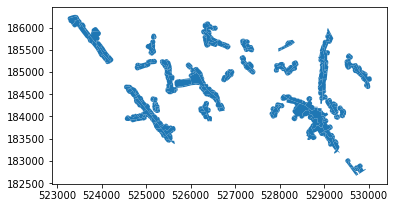

In [239]:
oa_chs.plot()

In [240]:
oa_chs

,OA11CD,LSOA11CD,WD11CD_BF,WD11NM_BF,LAD11CD,LAD11NM,RGN11CD,LSOA11NM,USUALRES,HHOLDRES,...,HHOLDS,AVHHOLDSZ,PunCare,PLMTACT,area,OA,Sub,Super,Group,geometry
24,E00002700,E01000556,E05000095,Mapesbury,E09000005,Brent,E12000007,Brent 015D,410,410,...,149,2.8,22.0,13.17,0.022,E00002700,G1b,G,G1,"POLYGON ((523689.412 185723.194, 523709.398 18..."
60,E00004314,E01000872,E05000132,Fortune Green,E09000007,Camden,E12000007,Camden 005B,318,312,...,153,2.0,15.0,10.06,0.022,E00004314,E1b,E,E1,"POLYGON ((524213.751 185210.083, 524186.082 18..."
76,E00002705,E01000558,E05000095,Mapesbury,E09000005,Brent,E12000007,Brent 015F,270,270,...,125,2.2,30.0,18.52,0.026,E00002705,E1b,E,E1,"POLYGON ((523936.146 185396.672, 523986.256 18..."
122,E00004578,E01000921,E05000139,Kentish Town,E09000007,Camden,E12000007,Camden 003C,283,283,...,154,1.8,17.0,10.25,0.014,E00004578,E2b,E,E2,"POLYGON ((529166.918 185659.521, 529158.000 18..."
123,E00004579,E01000928,E05000139,Kentish Town,E09000007,Camden,E12000007,Camden 003E,253,253,...,105,2.4,27.0,13.83,0.044,E00004579,E2a,E,E2,"MULTIPOLYGON (((529135.907 185895.478, 529098...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24727,E00004270,E01000869,E05000131,Cantelowes,E09000007,Camden,E12000007,Camden 015E,448,448,...,189,2.4,23.0,10.49,0.018,E00004270,B3a,B,B3,"POLYGON ((529848.964 184886.700, 529866.323 18..."
24920,E00004344,E01000883,E05000133,Frognal and Fitzjohns,E09000007,Camden,E12000007,Camden 008C,249,242,...,118,2.1,12.0,13.25,0.017,E00004344,D1c,D,D1,"POLYGON ((526610.000 184527.000, 526612.467 18..."
24986,E00013749,E01002764,E05000375,Holloway,E09000019,Islington,E12000007,Islington 010A,253,253,...,114,2.2,29.0,25.30,0.015,E00013749,B3a,B,B3,"POLYGON ((529981.034 184943.535, 529953.349 18..."
24998,E00004728,E01000956,E05000143,St Pancras and Somers Town,E09000007,Camden,E12000007,Camden 022E,563,563,...,199,2.8,66.0,18.83,0.003,E00004728,B2b,B,B2,"POLYGON ((529831.278 182839.486, 529826.670 18..."


In [243]:
broadband = pd.read_csv("High Street Dimensions/Broadband Speeds - Internet Usage.csv")

In [244]:
broadband

,oa11,Median download speed (Mbit/s),Average download speed (Mbit/s),Minimum download speed (Mbit/s),Maximum download speed (Mbit/s),Average download speed (Mbit/s) for lines < 10Mbit/s,Average download speed (Mbit/s) for lines 10<30Mbit/s,Average download speed (Mbit/s) for SFBB lines,Average download speed (Mbit/s) for UFBB lines,Median upload speed (Mbit/s),...,Number of connections 5<10 Mbit/s (number of lines),Number of connections 10<30 Mbit/s (number of lines),Number of connections 30<300 Mbit/s (number of lines),Number of connections >= 300 Mbit/s (number of lines),Number of connections >= 30 Mbit/s (number of lines),Average data usage (GB),Average data usage (GB) for lines < 10Mbit/s,Average data usage (GB) for Basic BB lines,Average data usage (GB) for SFBB lines,Average data usage (GB) for UFBB lines
0,E00000001,10.7,28.2,0.9,80.0,7.0,10.9,69.0,NaN,1.1,...,17,12,15,0,15,69.0,49.0,58.0,105.0,NaN
1,E00000003,13.1,33.6,2.6,80.0,7.3,12.6,63.6,NaN,1.2,...,12,14,23,0,23,83.0,59.0,78.0,100.0,NaN
2,E00000005,9.4,9.5,3.4,16.8,7.5,12.3,NaN,NaN,1.1,...,22,17,0,0,0,108.0,79.0,146.0,NaN,NaN
3,E00000007,10.7,11.5,0.6,24.4,6.7,15.2,NaN,NaN,1.1,...,59,98,0,0,0,102.0,45.0,142.0,NaN,NaN
4,E00000010,19.3,29.6,6.6,80.0,8.5,17.2,60.7,NaN,1.2,...,6,55,26,0,26,170.0,40.0,159.0,214.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231904,W00010261,39.0,31.4,2.4,80.0,5.6,20.8,50.5,NaN,9.8,...,31,1,60,0,60,313.0,232.0,89.0,370.0,NaN
231905,W00010262,50.0,67.4,4.6,200.0,7.2,16.9,91.9,NaN,5.0,...,1,18,42,0,42,261.0,110.0,364.0,223.0,NaN
231906,W00010263,39.9,31.1,1.8,80.0,5.9,NaN,52.2,NaN,10.0,...,37,0,61,0,61,310.0,190.0,NaN,407.0,NaN
231907,W00010264,40.0,35.7,3.1,78.5,6.5,15.0,49.4,NaN,10.0,...,23,3,66,0,66,275.0,157.0,58.0,334.0,NaN


In [245]:
broadband['OA11CD'] = broadband['oa11']

In [246]:
broadband1 = pd.merge(oa_chs, broadband, on="OA11CD")

In [247]:
polygons = CamHS.copy()

# Spatial Joins
pointsInPolygon = gpd.sjoin(broadband1, polygons, how="inner", op='intersects')

# Group according to the column by which you want to aggregate data
broadband_speed = pointsInPolygon.groupby(['highstreet_name']).sum()

In [249]:
broadband_speed

,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,PunCare,PLMTACT,area,Median download speed (Mbit/s),...,Number of connections >= 30 Mbit/s (number of lines),Average data usage (GB),Average data usage (GB) for lines < 10Mbit/s,Average data usage (GB) for Basic BB lines,Average data usage (GB) for SFBB lines,Average data usage (GB) for UFBB lines,index_right,objectid,highstreet,area_ha
highstreet_name,,,,,,,,,,,,,,,,,,,,,
Belsize,2642,2639,3,1460.9,1269,21.2,156.0,78.83,0.218,600.2,...,782,1865.0,833.0,1558.0,2109.0,0.0,40,3030,3030,50.696148
Brecknock,7839,7768,71,4471.6,3487,57.6,567.0,418.31,0.494,1225.8,...,1799,6663.0,4166.0,6997.0,6915.0,349.0,156,2522,2522,398.526978
CamdenT,15773,15618,155,7866.2,6897,107.8,1386.0,769.77,1.340,1884.9,...,3452,11841.0,6208.0,11526.0,13077.0,594.0,235,13489,13489,2648.415108
Cricklewood,7666,7629,37,2757.2,3124,51.7,506.0,269.68,0.817,654.0,...,1139,6436.0,2540.0,6013.0,7417.0,160.0,21,6762,6762,595.116046
Eversholt,2769,2679,90,3367.9,1129,21.1,256.0,164.93,0.215,307.2,...,453,2574.0,680.0,2750.0,2663.0,199.0,0,5346,5346,56.733281
Fortress,10198,10100,98,4790.2,4516,71.3,870.0,497.13,0.911,1288.4,...,2318,7199.0,3938.0,6957.0,7767.0,1751.0,96,9120,9120,906.423001
Fortune,2931,2530,401,1003.4,1134,18.1,200.0,79.30,0.340,431.0,...,745,2016.0,591.0,1810.0,2169.0,588.0,16,2976,2976,52.651898
Hampstead,5694,5444,250,2474.5,2509,45.9,429.0,247.12,0.772,1084.0,...,1569,3960.0,1761.0,3014.0,4551.0,2635.0,252,11634,11634,378.330212
Haverstock,3454,3413,41,1971.3,1711,26.4,240.0,172.04,0.293,704.0,...,956,2626.0,1163.0,1794.0,3131.0,1022.0,143,3978,3978,91.966322


In [250]:
broadband_speed.to_csv("outputs_csv/broadband speeds.csv")

### Public Transport Accessibility 

The measure therefore reflects:

- Walking time from the point-of interest to the public transport access points;
- The reliability of the service modes available;
- The number of services available within the catchment; and
- The level of service at the public transport access points - i.e. average waiting time.

Each area is graded between 0 and 6b, where a score of 0 is very poor access to public transport, and 6b is excellent access to public transport.

In [160]:
access = pd.read_csv("https://data.london.gov.uk/download/public-transport-accessibility-levels/77d9b319-931e-4090-bf8e-f578938bd352/LSOA2011%20AvPTAI2015.csv")

In [161]:
access

,LSOA2011,AvPTAI2015,PTAL,PTAIHigh,PTAILow
0,E01000001,69.82330,6b,97.4435,35.91900
1,E01000002,83.78200,6b,117.9120,66.35030
2,E01000003,41.74170,6b,49.5318,37.36350
3,E01000005,85.88930,6b,120.8470,45.91680
4,E01000006,22.45580,5,34.1054,0.00000
...,...,...,...,...,...
4830,E01033742,3.95321,1b,5.7986,3.05852
4831,E01033743,3.81744,1b,14.3944,0.00000
4832,E01033744,10.17090,3,23.5689,3.57501
4833,E01033745,4.68378,1b,11.4851,0.00000


In [162]:
access['lsoa11cd'] = access['LSOA2011']

In [163]:
access1 = pd.merge(lsoa, access, on="lsoa11cd")

In [166]:
polygons = CamHS.copy()

# Spatial Joins
pointsInPolygon = gpd.sjoin(access1, polygons, how="inner", op='intersects')

# Group according to the column by which you want to aggregate data
access_transport = pointsInPolygon.groupby(['highstreet_name']).sum()

In [167]:
access_transport

,objectid_left,st_areasha,st_lengths,AvPTAI2015,PTAIHigh,PTAILow,index_right,objectid_right,highstreet,area_ha
highstreet_name,,,,,,,,,,
Belsize,2576,4.195492e+05,6462.295720,51.01600,73.1562,35.66050,12,909,909,15.208845
Brecknock,15264,9.816231e+05,17395.082236,145.86181,196.5772,93.06654,54,873,873,137.951646
CamdenT,12439,1.775919e+06,30423.046147,441.32620,598.0468,288.67670,70,4018,4018,788.889607
Cricklewood,4519,1.756821e+06,22506.707124,119.23376,170.6629,68.90294,8,2576,2576,226.710875
Eversholt,1877,2.233864e+05,3554.416000,147.66280,194.7515,84.18850,0,1188,1188,12.607396
Fortress,8826,1.449077e+06,25875.931361,256.90000,341.5430,156.96679,30,2850,2850,283.257188
Fortune,4298,9.723385e+05,13483.875961,58.13800,99.0015,25.94635,10,1860,1860,32.907436
Hampstead,6126,2.235913e+06,23776.701029,83.68138,139.5614,41.23758,84,3878,3878,126.110071
Haverstock,3419,4.728354e+05,7716.849190,67.02270,83.1748,52.72250,44,1224,1224,28.297330


In [168]:
access_transport.to_csv('outputs_csv/transport_access.csv')

### Road Causalties 

In [169]:
road = pd.read_excel("https://data.london.gov.uk/download/road-casualties-severity-borough/c914957e-a45c-4e06-8336-3e55408690ec/road-casualties-severity-lsoa-msoa-ward.xls")

In [170]:
road

,Unnamed: 0,Unnamed: 1,2010,Unnamed: 3,Unnamed: 4,Unnamed: 5,2011,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 28,Unnamed: 29,2017,Unnamed: 31,Unnamed: 32,Unnamed: 33,2018,Unnamed: 35,Unnamed: 36,Unnamed: 37
0,LSOA Code,LSOA Name,Fatal,Serious,Slight,2010 Total,Fatal,Serious,Slight,2011 Total,...,Slight,2016 Total,Fatal,Serious,Slight,2017 Total,Fatal,Serious,Slight,2018 Total
1,E01000001,City of London 001A,0,0,13,13,0,1,17,18,...,17,19,0,1,12,13,0,4,3,7
2,E01000002,City of London 001B,0,0,5,5,0,0,5,5,...,4,5,0,1,8,9,0,2,5,7
3,E01000003,City of London 001C,0,0,0,0,0,0,0,0,...,4,5,0,0,1,1,0,2,5,7
4,E01000005,City of London 001E,0,1,16,17,0,1,22,23,...,19,23,0,1,22,23,0,7,22,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4833,E01004738,Westminster 024D,0,0,5,5,0,1,11,12,...,13,16,0,2,10,12,0,3,3,6
4834,E01004739,Westminster 024E,0,0,0,0,0,0,0,0,...,13,16,0,2,10,12,0,3,3,6
4835,E01004741,Westminster 024F,0,1,3,4,0,1,4,5,...,4,6,0,0,9,9,0,1,4,5
4836,not geo coded,NaN,0,1,8,9,0,0,7,7,...,5,5,0,2,16,18,0,0,0,0


In [172]:
road = road.rename(columns=road.iloc[0])

In [174]:
road

,LSOA Code,LSOA Name,Fatal,Serious,Slight,2010 Total,Fatal,Serious,Slight,2011 Total,...,Slight,2016 Total,Fatal,Serious,Slight,2017 Total,Fatal,Serious,Slight,2018 Total
0,LSOA Code,LSOA Name,Fatal,Serious,Slight,2010 Total,Fatal,Serious,Slight,2011 Total,...,Slight,2016 Total,Fatal,Serious,Slight,2017 Total,Fatal,Serious,Slight,2018 Total
1,E01000001,City of London 001A,0,0,13,13,0,1,17,18,...,17,19,0,1,12,13,0,4,3,7
2,E01000002,City of London 001B,0,0,5,5,0,0,5,5,...,4,5,0,1,8,9,0,2,5,7
3,E01000003,City of London 001C,0,0,0,0,0,0,0,0,...,4,5,0,0,1,1,0,2,5,7
4,E01000005,City of London 001E,0,1,16,17,0,1,22,23,...,19,23,0,1,22,23,0,7,22,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4833,E01004738,Westminster 024D,0,0,5,5,0,1,11,12,...,13,16,0,2,10,12,0,3,3,6
4834,E01004739,Westminster 024E,0,0,0,0,0,0,0,0,...,13,16,0,2,10,12,0,3,3,6
4835,E01004741,Westminster 024F,0,1,3,4,0,1,4,5,...,4,6,0,0,9,9,0,1,4,5
4836,not geo coded,NaN,0,1,8,9,0,0,7,7,...,5,5,0,2,16,18,0,0,0,0


In [183]:
road = road.drop(road.index[0])

In [188]:
road.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4837 entries, 1 to 4837
Data columns (total 39 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   LSOA Code   4837 non-null   object
 1   LSOA Name   4836 non-null   object
 2   Fatal       4837 non-null   object
 3   Serious     4837 non-null   object
 4   Slight      4837 non-null   object
 5   2010 Total  4837 non-null   object
 6   Fatal       4837 non-null   object
 7   Serious     4837 non-null   object
 8   Slight      4837 non-null   object
 9   2011 Total  4837 non-null   object
 10  Fatal       4837 non-null   object
 11  Serious     4837 non-null   object
 12  Slight      4837 non-null   object
 13  2012 Total  4837 non-null   object
 14  Fatal       4837 non-null   object
 15  Serious     4837 non-null   object
 16  Slight      4837 non-null   object
 17  2013 Total  4837 non-null   object
 18  Fatal       4187 non-null   object
 19  Serious     4187 non-null   object
 20  Slight  

In [189]:
print(list(road.columns.values))

['LSOA Code', 'LSOA Name', 'Fatal', 'Serious', 'Slight', '2010 Total', 'Fatal', 'Serious', 'Slight', '2011 Total', 'Fatal', 'Serious', 'Slight', '2012 Total', 'Fatal', 'Serious', 'Slight', '2013 Total', 'Fatal', 'Serious', 'Slight', '2014 Total', 'Fatal', 'Serious', 'Slight', '2015 Total', 'Fatal', 'Serious', 'Slight', '2016 Total', 'Fatal', 'Serious', 'Slight', '2017 Total', 'Fatal', 'Serious', 'Slight', '2018 Total', 'lsoa11cd']


In [190]:
cols = ['Fatal', 'Serious', 'Slight', '2010 Total', 'Fatal', 'Serious', 'Slight', '2011 Total', 'Fatal', 'Serious', 'Slight', '2012 Total', 'Fatal', 'Serious', 'Slight', '2013 Total', 'Fatal', 'Serious', 'Slight', '2014 Total', 'Fatal', 'Serious', 'Slight', '2015 Total', 'Fatal', 'Serious', 'Slight', '2016 Total', 'Fatal', 'Serious', 'Slight', '2017 Total', 'Fatal', 'Serious', 'Slight', '2018 Total']

In [191]:
for m in cols:
    print(f"Converting {m}")
    road[m] = road[m].astype('float')

Converting Fatal
Converting Serious
Converting Slight
Converting 2010 Total
Converting Fatal
Converting Serious
Converting Slight
Converting 2011 Total
Converting Fatal
Converting Serious
Converting Slight
Converting 2012 Total
Converting Fatal
Converting Serious
Converting Slight
Converting 2013 Total
Converting Fatal
Converting Serious
Converting Slight
Converting 2014 Total
Converting Fatal
Converting Serious
Converting Slight
Converting 2015 Total
Converting Fatal
Converting Serious
Converting Slight
Converting 2016 Total
Converting Fatal
Converting Serious
Converting Slight
Converting 2017 Total
Converting Fatal
Converting Serious
Converting Slight
Converting 2018 Total


In [192]:
road['lsoa11cd'] = road['LSOA Code']

In [193]:
roads = pd.merge(lsoa, road, on="lsoa11cd")

In [194]:
polygons = CamHS.copy()

# Spatial Joins
pointsInPolygon = gpd.sjoin(roads, polygons, how="inner", op='intersects')

# Group according to the column by which you want to aggregate data
road_casualty = pointsInPolygon.groupby(['highstreet_name']).sum()

In [195]:
road_casualty

,objectid_left,st_areasha,st_lengths,Fatal,Serious,Slight,2010 Total,Fatal,Serious,Slight,...,Slight,2017 Total,Fatal,Serious,Slight,2018 Total,index_right,objectid_right,highstreet,area_ha
highstreet_name,,,,,,,,,,,,,,,,,,,,,
Belsize,2576,4.195492e+05,6462.295720,0.0,1.0,5.0,6.0,0.0,1.0,3.0,...,5.0,6.0,0.0,1.0,3.0,4.0,12,909,909,15.208845
Brecknock,15264,9.816231e+05,17395.082236,0.0,5.0,29.0,34.0,0.0,6.0,65.0,...,44.0,50.0,1.0,8.0,43.0,52.0,54,873,873,137.951646
CamdenT,12439,1.775919e+06,30423.046147,3.0,19.0,137.0,159.0,1.0,14.0,113.0,...,142.0,161.0,0.0,32.0,157.0,189.0,70,4018,4018,788.889607
Cricklewood,4519,1.756821e+06,22506.707124,2.0,2.0,85.0,89.0,0.0,9.0,55.0,...,61.0,70.0,1.0,7.0,65.0,73.0,8,2576,2576,226.710875
Eversholt,1877,2.233864e+05,3554.416000,0.0,2.0,20.0,22.0,0.0,2.0,19.0,...,17.0,20.0,0.0,6.0,22.0,28.0,0,1188,1188,12.607396
Fortress,8826,1.449077e+06,25875.931361,1.0,12.0,70.0,83.0,0.0,12.0,87.0,...,79.0,91.0,2.0,9.0,88.0,99.0,30,2850,2850,283.257188
Fortune,4298,9.723385e+05,13483.875961,1.0,2.0,11.0,14.0,0.0,1.0,15.0,...,22.0,30.0,0.0,5.0,31.0,36.0,10,1860,1860,32.907436
Hampstead,6126,2.235913e+06,23776.701029,0.0,5.0,24.0,29.0,0.0,1.0,15.0,...,31.0,35.0,0.0,1.0,15.0,16.0,84,3878,3878,126.110071
Haverstock,3419,4.728354e+05,7716.849190,1.0,1.0,16.0,18.0,0.0,0.0,13.0,...,12.0,15.0,0.0,1.0,8.0,9.0,44,1224,1224,28.297330


In [197]:
road_casualty.to_csv('outputs_csv/road casaulties on highstreets.csv')

### Noise Pollution

In [14]:
noise = gpd.read_file("https://data.london.gov.uk/download/noise-pollution-in-london/1154a491-c68f-4451-9111-09bac975be99/Road_LAeq_16h_London.zip")

In [202]:
noise

,NoiseClass,geometry
0,55.0-59.9,"POLYGON ((543315.000 157085.000, 543305.000 15..."
1,55.0-59.9,"POLYGON ((543295.000 157225.000, 543295.000 15..."
2,55.0-59.9,"POLYGON ((529075.000 157304.819, 529068.100 15..."
3,55.0-59.9,"POLYGON ((543305.000 157115.000, 543305.000 15..."
4,55.0-59.9,"POLYGON ((529075.000 157315.000, 529075.000 15..."
...,...,...
200169,>=75.0,"POLYGON ((530715.000 200865.000, 530705.000 20..."
200170,>=75.0,"POLYGON ((534743.283 200095.000, 534785.000 20..."
200171,>=75.0,"POLYGON ((536385.000 200016.137, 536385.000 20..."
200172,>=75.0,"MULTIPOLYGON (((521205.000 196605.000, 521205...."


<AxesSubplot:>

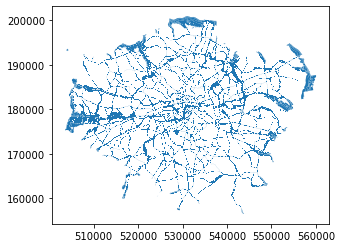

In [207]:
noise.plot()

In [15]:
noise1 =  noise[ noise.geometry.is_valid ]

In [16]:
noise2 = gpd.clip(noise1, CamHS)

In [210]:
noise2

,NoiseClass,geometry
39545,55.0-59.9,"POLYGON ((529755.000 182687.996, 529755.000 18..."
39567,55.0-59.9,"POLYGON ((529725.000 182695.000, 529715.000 18..."
39637,55.0-59.9,"POLYGON ((529715.000 182705.000, 529705.000 18..."
39638,55.0-59.9,"POLYGON ((529805.000 182725.000, 529805.000 18..."
39664,55.0-59.9,"POLYGON ((529845.000 182744.674, 529845.000 18..."
...,...,...
198274,>=75.0,"POLYGON ((523475.000 186185.000, 523465.000 18..."
198281,>=75.0,"POLYGON ((523465.000 186225.000, 523465.000 18..."
198285,>=75.0,"POLYGON ((523445.000 186235.000, 523435.000 18..."
198288,>=75.0,"POLYGON ((523435.000 186255.000, 523425.000 18..."


<AxesSubplot:>

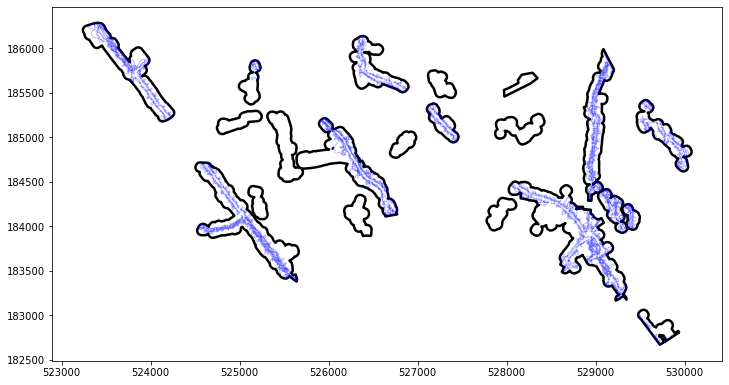

In [19]:
fig, ax = plt.subplots(1,1, figsize=(12,9))

CamHS.plot(edgecolor='black', facecolor='none', linewidth=2.5, ax=ax)
noise2.plot(edgecolor="blue", facecolor='none', linewidth=0.2, ax=ax)

In [217]:
polygons = CamHS.copy()

# Spatial Joins
pointsInPolygon = gpd.sjoin(noise2, polygons, how="inner", op='intersects')

# Group according to the column by which you want to aggregate data
noise_pollution = pointsInPolygon.groupby(['highstreet_name']).sum()

In [219]:
pointsInPolygon

,NoiseClass,geometry,index_right,objectid,highstreet,highstre_1,area_ha,gdb_geomat,layer,path,highstreet_name
39545,55.0-59.9,"POLYGON ((529755.000 182687.996, 529755.000 18...",0,594,594,"Eversholt Street, Somers Town",6.303698,None,Eversholt,C:/Users/CHRISTINA/OneDrive - University Colle...,Eversholt
39567,55.0-59.9,"POLYGON ((529725.000 182695.000, 529715.000 18...",0,594,594,"Eversholt Street, Somers Town",6.303698,None,Eversholt,C:/Users/CHRISTINA/OneDrive - University Colle...,Eversholt
39637,55.0-59.9,"POLYGON ((529715.000 182705.000, 529705.000 18...",0,594,594,"Eversholt Street, Somers Town",6.303698,None,Eversholt,C:/Users/CHRISTINA/OneDrive - University Colle...,Eversholt
39638,55.0-59.9,"POLYGON ((529805.000 182725.000, 529805.000 18...",0,594,594,"Eversholt Street, Somers Town",6.303698,None,Eversholt,C:/Users/CHRISTINA/OneDrive - University Colle...,Eversholt
39664,55.0-59.9,"POLYGON ((529845.000 182744.674, 529845.000 18...",0,594,594,"Eversholt Street, Somers Town",6.303698,None,Eversholt,C:/Users/CHRISTINA/OneDrive - University Colle...,Eversholt
...,...,...,...,...,...,...,...,...,...,...,...
189730,70.0-74.9,"POLYGON ((525215.000 185795.000, 525205.000 18...",2,372,372,"Fortune Green Road, Fortune Green.",6.581487,None,Fortune,C:/Users/CHRISTINA/OneDrive - University Colle...,Fortune
189768,70.0-74.9,"POLYGON ((525215.000 185835.000, 525215.000 18...",2,372,372,"Fortune Green Road, Fortune Green.",6.581487,None,Fortune,C:/Users/CHRISTINA/OneDrive - University Colle...,Fortune
189811,70.0-74.9,"POLYGON ((525175.000 185815.000, 525155.000 18...",2,372,372,"Fortune Green Road, Fortune Green.",6.581487,None,Fortune,C:/Users/CHRISTINA/OneDrive - University Colle...,Fortune
189823,70.0-74.9,"POLYGON ((525195.000 185857.951, 525195.000 18...",2,372,372,"Fortune Green Road, Fortune Green.",6.581487,None,Fortune,C:/Users/CHRISTINA/OneDrive - University Colle...,Fortune


In [221]:
pointsInPolygon.to_csv('outputs_csv/noise pollution but needs work.csv')

### Air Pollution

In [226]:
air = gpd.read_file("High Street Dimensions/Air Pollution/ArcGIS/Road Transport/LAEI2013_Coldstarts_grid.shp")

<AxesSubplot:>

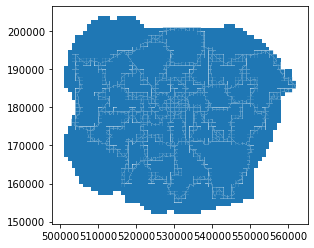

In [228]:
air.plot()

In [229]:
air_clip = gpd.clip(air, CamHS)

<AxesSubplot:>

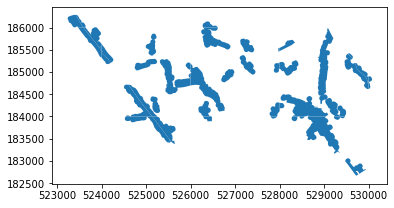

In [230]:
air_clip.plot()

In [231]:
air_clip

,OBJECTID,GridIdEx,GridIdKm,REFERENCES,X_COORD,Y_COORD,Area,AreaRound,BoroughEx,LocationEx,...,PM25ExPL25,PM25DL25,PM25Tot25,PM25ExT30,PM25ExPC30,PM25ExDC30,PM25ExPL30,PM25DL30,PM25Tot30,geometry
724,725,725.0,8847.0,TQ2386,523500.0,186500.0,0.738782,0.74,Barnet,Outer,...,0.0,0.001382,0.017348,0.000013,0.0,0.008592,0.0,0.001071,0.009676,"MULTIPOLYGON (((523588.783 185999.997, 523583...."
725,726,726.0,8847.0,TQ2386,523500.0,186500.0,0.258074,0.26,Brent,Outer,...,0.0,0.000880,0.004983,0.000003,0.0,0.002192,0.0,0.000689,0.002884,"POLYGON ((523588.783 185999.997, 523470.675 18..."
772,773,773.0,9193.0,TQ2584,525500.0,184500.0,0.011766,0.01,Brent,Outer,...,0.0,0.000029,0.000303,0.000000,0.0,0.000146,0.0,0.000023,0.000169,"POLYGON ((525137.065 184000.000, 524999.999 18..."
773,774,774.0,9193.0,TQ2584,525500.0,184500.0,0.985090,0.99,Camden,Inner,...,0.0,0.002110,0.011903,0.000036,0.0,0.006505,0.0,0.001664,0.008205,"MULTIPOLYGON (((525137.065 184000.000, 525000...."
774,775,775.0,9195.0,TQ2784,527500.0,184500.0,0.996836,1.00,Camden,Inner,...,0.0,0.002209,0.015696,0.000059,0.0,0.008904,0.0,0.001742,0.010704,"MULTIPOLYGON (((527311.747 185000.004, 527458...."
775,776,776.0,9197.0,TQ2984,529500.0,184500.0,0.978050,0.98,Camden,Inner,...,0.0,0.002951,0.010794,0.000079,0.0,0.004916,0.0,0.002327,0.007323,"MULTIPOLYGON (((529000.000 185000.004, 529077...."
776,777,777.0,9197.0,TQ2984,529500.0,184500.0,0.018781,0.02,Islington,Inner,...,0.0,0.000049,0.000167,0.000001,0.0,0.000075,0.0,0.000038,0.000115,"POLYGON ((529803.201 185000.004, 529942.922 18..."
1442,1416,1416.0,8850.0,TQ2686,526500.0,186500.0,0.996846,1.00,Camden,Inner,...,0.0,0.001158,0.007479,0.000018,0.0,0.004231,0.0,0.000913,0.005161,"POLYGON ((526609.424 185999.997, 526282.376 18..."
1480,1454,1454.0,9192.0,TQ2484,524500.0,184500.0,0.250603,0.25,Camden,Inner,...,0.0,0.000466,0.002854,0.000009,0.0,0.001582,0.0,0.000367,0.001959,"POLYGON ((524999.999 184303.939, 524999.999 18..."
1481,1455,1455.0,9192.0,TQ2484,524500.0,184500.0,0.746259,0.75,Brent,Outer,...,0.0,0.001243,0.015041,0.000009,0.0,0.007379,0.0,0.000973,0.008361,"MULTIPOLYGON (((524606.225 184713.957, 524612...."


In [232]:
polygons = CamHS.copy()

# Spatial Joins
pointsInPolygon = gpd.sjoin(air_clip, polygons, how="inner", op='intersects')

# Group according to the column by which you want to aggregate data
air_pollution = pointsInPolygon.groupby(['highstreet_name']).sum()

In [233]:
air_pollution

,OBJECTID,GridIdEx,GridIdKm,X_COORD,Y_COORD,Area,AreaRound,Shape_Leng,Shape_Area,CheckTLRN,...,PM25ExT30,PM25ExPC30,PM25ExDC30,PM25ExPL30,PM25DL30,PM25Tot30,index_right,objectid,highstreet,area_ha
highstreet_name,,,,,,,,,,,,,,,,,,,,,
Belsize,4245,4245.0,18216.0,1053000.0,370000.0,1.993688,2.00,8000.003956,2.000002e+06,0,...,0.000097,0.0,0.019713,0.0,0.005281,0.025090,8,606,606,10.139230
Brecknock,8693,8693.0,54840.0,3179000.0,1109000.0,2.990468,3.00,16743.104946,3.000000e+06,0,...,0.000181,0.0,0.015267,0.0,0.006862,0.022313,36,582,582,91.967764
CamdenT,7231,7231.0,37130.0,2116000.0,736000.0,3.755777,3.77,15759.613777,3.767724e+06,0,...,0.000448,0.0,0.024512,0.0,0.010304,0.035266,20,1148,1148,225.397030
Cricklewood,16130,16130.0,71811.0,4191000.0,1486000.0,2.990554,3.00,19782.864276,2.999981e+06,0,...,0.000051,0.0,0.027127,0.0,0.005145,0.032324,8,2576,2576,226.710875
Eversholt,5446,5446.0,18910.0,1059000.0,366000.0,1.589317,1.59,7504.341670,1.594374e+06,0,...,0.000873,0.0,0.010862,0.0,0.005091,0.016827,0,1188,1188,12.607396
Fortress,9246,9246.0,45467.0,2645500.0,925500.0,3.968533,3.98,18415.613777,3.981163e+06,0,...,0.000219,0.0,0.022552,0.0,0.009287,0.032060,15,1425,1425,141.628594
Fortune,4897,4897.0,18041.0,1050000.0,371000.0,1.569409,1.57,7857.000818,1.574368e+06,0,...,0.000044,0.0,0.008387,0.0,0.002446,0.010877,4,744,744,13.162975
Hampstead,4205,4205.0,17872.0,1053000.0,372000.0,1.993684,2.00,8000.003956,2.000002e+06,0,...,0.000056,0.0,0.012407,0.0,0.002963,0.015424,24,1108,1108,36.031449
Haverstock,2885,2885.0,18218.0,1055000.0,370000.0,1.993659,2.00,7999.970976,1.999985e+06,0,...,0.000108,0.0,0.016599,0.0,0.003758,0.020464,22,612,612,14.148665


In [234]:
air_pollution.to_csv('outputs_csv/air pollution at high streets.csv')